# September 2020

# Final Capstone Submission 

### Workbook for Predicting CO2 Flux and Storage Above the Canopy Cover in Boreal Forests

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from scipy import stats
from scipy.stats import norm

### Reading the .csv files requried 

In [2]:
#Reading the CSV data files
Tower_Flux_Meter_NSA_OBS = pd.read_csv('data/Tower_Flux_Meter_NSA_OBS.csv', sep="''", delimiter=",", quotechar="'")

In [3]:
#Reading the CSV data files
Tower_Flux_Meter_SSA_OBS = pd.read_csv('data/Tower_Flux_Meter_SSA_OBS.csv', sep="''", delimiter=",", quotechar="'")

### Defining a function to strip the brackets and punctuations from the columns and formatting the csv to a column wise dataframe 

In [4]:
def Clean_data(data_frame):

    # Cleaning up columns and column headers:
    new_headers = []

    for col in data_frame.select_dtypes([np.object]):
        data_frame[col] = data_frame[col].str.strip('"')

    for col in data_frame.select_dtypes([np.object]):
        data_frame[col] = data_frame[col].str.strip("['']")

    for header in data_frame.columns: # data.columns is your list of headers
        header = header.strip('"') # Remove the quotes off each header
        new_headers.append(header) # Save the new strings without the quotes

    data_frame.columns = new_headers
    print(f"The dataframe information and the dataframe head is as given: ")
    data_frame.info()
    return data_frame.head()

In [5]:
Clean_data(Tower_Flux_Meter_NSA_OBS)

The dataframe information and the dataframe head is as given: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46080 entries, 0 to 46079
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SITE_NAME                    46080 non-null  object 
 1   SUB_SITE                     46080 non-null  object 
 2   DATE_OBS                     46080 non-null  object 
 3   TIME_OBS                     46080 non-null  int64  
 4   SENSIBLE_HEAT_FLUX_ABV_CNPY  46080 non-null  float64
 5   LATENT_HEAT_FLUX_ABV_CNPY    46080 non-null  float64
 6   NET_RAD_ABV_CNPY             46080 non-null  float64
 7   CO2_FLUX_ABV_CNPY            46080 non-null  float64
 8   CO2_CONC_ABV_CNPY            46080 non-null  float64
 9   CO2_STORAGE                  46080 non-null  float64
 10  DOWN_PPFD_ABV_CNPY           46080 non-null  float64
 11  DOWN_PPFD_BELOW_CNPY         46080 non-null  float64
 12  WIND_DIR_MA

SITE_NAME     SUB_SITE     DATE_OBS  TIME_OBS  \
0  NSA-OBS-FLXTR  9TF03-FLX01  16-MAR-1994        30   
1  NSA-OBS-FLXTR  9TF03-FLX01  16-MAR-1994       100   
2  NSA-OBS-FLXTR  9TF03-FLX01  16-MAR-1994       130   
3  NSA-OBS-FLXTR  9TF03-FLX01  16-MAR-1994       200   
4  NSA-OBS-FLXTR  9TF03-FLX01  16-MAR-1994       230   

   SENSIBLE_HEAT_FLUX_ABV_CNPY  LATENT_HEAT_FLUX_ABV_CNPY  NET_RAD_ABV_CNPY  \
0                       -999.0                     -999.0            -999.0   
1                       -999.0                     -999.0            -999.0   
2                       -999.0                     -999.0            -999.0   
3                       -999.0                     -999.0            -999.0   
4                       -999.0                     -999.0            -999.0   

   CO2_FLUX_ABV_CNPY  CO2_CONC_ABV_CNPY  CO2_STORAGE  ...  SOIL_TEMP_5CM_2  \
0             -999.0             -999.0       -999.0  ...           -999.0   
1             -999.0             -999.0       -999.0  ...           -999.0   
2             -999.0             -999.0       -999.0  ...           -999.0   
3             -999.0             -999.0       -999.0  ...           -999.0   
4             -999.0             -999.0       -999.0  ...           -999.0   

   SOIL_TEMP_10CM_2  SOIL_TEMP_20CM_2  SOIL_TEMP_50CM_2  SOIL_TEMP_100CM_2  \
0            -999.0            -999.0            -999.0             -999.0   
1            -999.0            -999.0            -999.0             -999.0   
2            -999.0            -999.0            -999.0             -999.0   
3            -999.0            -999.0            -999.0             -999.0   
4            -999.0            -999.0            -999.0             -999.0   

   VAPOR_PRESS_ABV_CNPY  RAIN_RATE  MONIN_OBUKHOV_LENGTH  CRTFCN_CODE  \
0                -999.0     -999.0                -999.0          CPI   
1                -999.0     -999.0                -999.0          CPI   
2                -999.0     -999.0                -999.0          CPI   
3                -999.0     -999.0                -999.0          CPI   
4                -999.0     -999.0                -999.0          CPI   

   REVISION_DATE  
0    05-FEB-1998  
1    05-FEB-1998  
2    05-FEB-1998  
3    05-FEB-1998  
4    05-FEB-1998  

[5 rows x 33 columns]

In [6]:
Tower_Flux_Meter_NSA_OBS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46080 entries, 0 to 46079
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SITE_NAME                    46080 non-null  object 
 1   SUB_SITE                     46080 non-null  object 
 2   DATE_OBS                     46080 non-null  object 
 3   TIME_OBS                     46080 non-null  int64  
 4   SENSIBLE_HEAT_FLUX_ABV_CNPY  46080 non-null  float64
 5   LATENT_HEAT_FLUX_ABV_CNPY    46080 non-null  float64
 6   NET_RAD_ABV_CNPY             46080 non-null  float64
 7   CO2_FLUX_ABV_CNPY            46080 non-null  float64
 8   CO2_CONC_ABV_CNPY            46080 non-null  float64
 9   CO2_STORAGE                  46080 non-null  float64
 10  DOWN_PPFD_ABV_CNPY           46080 non-null  float64
 11  DOWN_PPFD_BELOW_CNPY         46080 non-null  float64
 12  WIND_DIR_MAG_ABV_CNPY        46080 non-null  int64  
 13  WIND_SPEED_ABV_C

In [7]:
Clean_data(Tower_Flux_Meter_SSA_OBS)

The dataframe information and the dataframe head is as given: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17885 entries, 0 to 17884
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SITE_NAME                    17885 non-null  object 
 1   SUB_SITE                     17885 non-null  object 
 2   DATE_OBS                     17885 non-null  object 
 3   TIME_OBS                     17885 non-null  int64  
 4   SENSIBLE_HEAT_FLUX_ABV_CNPY  16682 non-null  float64
 5   CALC_SENSIBLE_HEAT_FLUX      17594 non-null  float64
 6   LATENT_HEAT_FLUX_ABV_CNPY    17037 non-null  float64
 7   CALC_LATENT_HEAT_FLUX        17803 non-null  float64
 8   NET_RAD_ABV_CNPY             17593 non-null  float64
 9   SOIL_HEAT_FLUX_7CM           17488 non-null  float64
 10  CO2_FLUX_ABV_CNPY            17037 non-null  float64
 11  CALC_CO2_FLUX                17797 non-null  float64
 12  CO2_CONC_AB

SITE_NAME     SUB_SITE     DATE_OBS  TIME_OBS  \
0  SSA-OBS-FLXTR  9TF09-FLX01  23-MAY-1994        30   
1  SSA-OBS-FLXTR  9TF09-FLX01  23-MAY-1994       100   
2  SSA-OBS-FLXTR  9TF09-FLX01  23-MAY-1994       130   
3  SSA-OBS-FLXTR  9TF09-FLX01  23-MAY-1994       200   
4  SSA-OBS-FLXTR  9TF09-FLX01  23-MAY-1994       230   

   SENSIBLE_HEAT_FLUX_ABV_CNPY  CALC_SENSIBLE_HEAT_FLUX  \
0                       -999.0                   -999.0   
1                       -999.0                   -999.0   
2                       -999.0                   -999.0   
3                       -999.0                   -999.0   
4                       -999.0                   -999.0   

   LATENT_HEAT_FLUX_ABV_CNPY  CALC_LATENT_HEAT_FLUX  NET_RAD_ABV_CNPY  \
0                     -999.0                 -999.0            -999.0   
1                     -999.0                 -999.0            -999.0   
2                     -999.0                 -999.0            -999.0   
3                     -999.0                 -999.0            -999.0   
4                     -999.0                 -999.0            -999.0   

   SOIL_HEAT_FLUX_7CM  ...  H2O_CONC_50CM  H2O_CONC_150CM  H2O_CONC_350CM  \
0              -999.0  ...            NaN             NaN             NaN   
1              -999.0  ...            NaN             NaN             NaN   
2              -999.0  ...            NaN             NaN             NaN   
3              -999.0  ...            NaN             NaN             NaN   
4              -999.0  ...            NaN             NaN             NaN   

   H2O_CONC_650CM  H2O_CONC_950CM  H2O_CONC_1250CM  H2O_CONC_1800CM  \
0             NaN             NaN              NaN              NaN   
1             NaN             NaN              NaN              NaN   
2             NaN             NaN              NaN              NaN   
3             NaN             NaN              NaN              NaN   
4             NaN             NaN              NaN              NaN   

   H2O_CONC_ABV_CNPY  CRTFCN_CODE  REVISION_DATE  
0                NaN          CPI    22-SEP-1998  
1                NaN          CPI    22-SEP-1998  
2                NaN          CPI    22-SEP-1998  
3                NaN          CPI    22-SEP-1998  
4                NaN          CPI    22-SEP-1998  

[5 rows x 64 columns]

In [8]:
print(f"Tried writing a for loop to remove the rows that contained all -999 values for the independent variables, but the loop only ran well the first time, if re-run from the beginning of the code file, for some reason the rows with -999 values get grouped, but don't get droped")
# df1=Tower_Flux_Meter_NSA_OBS.drop(columns = ['SITE_NAME','SUB_SITE','DATE_OBS','TIME_OBS','CRTFCN_CODE','REVISION_DATE'])
# # df1.loc[df1.apply(lambda row: all(round(value)==-999 for value in row), axis=1)]
# # df1


Tried writing a for loop to remove the rows that contained all -999 values for the independent variables, but the loop only ran well the first time, if re-run from the beginning of the code file, for some reason the rows with -999 values get grouped, but don't get droped


### Defing a function to choose the rows/data points/sites that contain the Old Black Spruce (OBS) canopy and choose the features that are going to be modeled.

### First going to work on the NSA dataframe - 'Tower_Flux_Meter_NSA_OBS' 

In [9]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    new_frame = new_frame[new_frame['SITE_NAME'].str.contains('NSA-OBS-|SSA-OBS-')]
    return new_frame

In [10]:
Select_Tower_Flux_Meter_NSA_OBS=select_columns(Tower_Flux_Meter_NSA_OBS, ['SITE_NAME',
                                                                          'DATE_OBS',
                                                                          'SENSIBLE_HEAT_FLUX_ABV_CNPY', 
                                                                          'LATENT_HEAT_FLUX_ABV_CNPY',
                                                                          'NET_RAD_ABV_CNPY', 
                                                                          'CO2_FLUX_ABV_CNPY', 
                                                                          'CO2_CONC_ABV_CNPY', 
                                                                          'CO2_STORAGE', 
                                                                          'WIND_DIR_MAG_ABV_CNPY',
                                                                          'WIND_SPEED_ABV_CNPY',  
                                                                          'FRICTION_VELOC_ABV_CNPY', 
                                                                          'AIR_TEMP_ABV_CNPY',
                                                                          'SOIL_TEMP_10CM_1',
                                                                          'SOIL_TEMP_10CM_2',
                                                                          'SOIL_TEMP_100CM_1',
                                                                          'SOIL_TEMP_100CM_2',
                                                                          'VAPOR_PRESS_ABV_CNPY',
                                                                          'RAIN_RATE'])

### Unknown values in many of the features were given a value of -999, so dropping rows that have -999 for all features

In [11]:
Select_Tower_Flux_Meter_NSA_OBS.drop(Select_Tower_Flux_Meter_NSA_OBS.index[(Select_Tower_Flux_Meter_NSA_OBS['SENSIBLE_HEAT_FLUX_ABV_CNPY'] == -999)
                                                                     & (Select_Tower_Flux_Meter_NSA_OBS['LATENT_HEAT_FLUX_ABV_CNPY'] == -999)
                                                                     & (Select_Tower_Flux_Meter_NSA_OBS['NET_RAD_ABV_CNPY'] == -999)
                                                                     & (Select_Tower_Flux_Meter_NSA_OBS['CO2_FLUX_ABV_CNPY'] == -999)
                                                                     & (Select_Tower_Flux_Meter_NSA_OBS['CO2_CONC_ABV_CNPY']==-999) 
                                                                     & (Select_Tower_Flux_Meter_NSA_OBS['CO2_STORAGE']==-999)
                                                                     & (Select_Tower_Flux_Meter_NSA_OBS['WIND_DIR_MAG_ABV_CNPY']==-999) 
                                                                     & (Select_Tower_Flux_Meter_NSA_OBS['WIND_SPEED_ABV_CNPY']==-999) 
                                                                     & (Select_Tower_Flux_Meter_NSA_OBS['FRICTION_VELOC_ABV_CNPY']==-999) 
                                                                     & (Select_Tower_Flux_Meter_NSA_OBS['AIR_TEMP_ABV_CNPY']==-999) 
                                                                     & (Select_Tower_Flux_Meter_NSA_OBS['SOIL_TEMP_10CM_1']==-999) 
                                                                     & (Select_Tower_Flux_Meter_NSA_OBS['SOIL_TEMP_10CM_2']==-999) 
                                                                     & (Select_Tower_Flux_Meter_NSA_OBS['SOIL_TEMP_100CM_1']==-999)
                                                                     & (Select_Tower_Flux_Meter_NSA_OBS['SOIL_TEMP_100CM_2']==-999) 
                                                                     & (Select_Tower_Flux_Meter_NSA_OBS['VAPOR_PRESS_ABV_CNPY']==-999)
                                                                     & (Select_Tower_Flux_Meter_NSA_OBS['RAIN_RATE']==-999)], inplace=True)

### In some rows, not all of the features have -999, and those rows weren't dropped, but are replaced with the median values.

In [12]:
a = Select_Tower_Flux_Meter_NSA_OBS[Select_Tower_Flux_Meter_NSA_OBS.columns[~Select_Tower_Flux_Meter_NSA_OBS.columns.isin(['SITE_NAME','SUB_SITE','DATE_OBS','CRTFCN_CODE','REVISION_DATE'])]]
for m in a:
    Select_Tower_Flux_Meter_NSA_OBS[m]=Select_Tower_Flux_Meter_NSA_OBS[m].replace(-999, Select_Tower_Flux_Meter_NSA_OBS[m].median())

### EDA for the NSA dataframe:

In [13]:
Select_Tower_Flux_Meter_NSA_OBS.head()

SITE_NAME     DATE_OBS  SENSIBLE_HEAT_FLUX_ABV_CNPY  \
53  NSA-OBS-FLXTR  17-MAR-1994                       -4.683   
54  NSA-OBS-FLXTR  17-MAR-1994                       -4.683   
55  NSA-OBS-FLXTR  17-MAR-1994                       -4.683   
56  NSA-OBS-FLXTR  17-MAR-1994                      -48.590   
57  NSA-OBS-FLXTR  17-MAR-1994                      -38.925   

    LATENT_HEAT_FLUX_ABV_CNPY  NET_RAD_ABV_CNPY  CO2_FLUX_ABV_CNPY  \
53                      0.728            -23.27              0.053   
54                      0.728            -62.04              0.053   
55                      0.728            -56.76              0.053   
56                      4.269            -31.68             -0.541   
57                      6.250            -25.08              1.514   

    CO2_CONC_ABV_CNPY  CO2_STORAGE  WIND_DIR_MAG_ABV_CNPY  \
53            361.353        -0.01                    156   
54            361.586        -0.01                    156   
55            361.947        -0.01                    156   
56            362.258         0.05                    118   
57            362.510         0.09                    119   

    WIND_SPEED_ABV_CNPY  FRICTION_VELOC_ABV_CNPY  AIR_TEMP_ABV_CNPY  \
53                 3.05                    0.298              1.337   
54                 3.05                    0.298             -7.849   
55                 3.05                    0.298             -8.279   
56                 4.32                    0.669             -8.441   
57                 4.27                    0.675             -8.387   

    SOIL_TEMP_10CM_1  SOIL_TEMP_10CM_2  SOIL_TEMP_100CM_1  SOIL_TEMP_100CM_2  \
53            -0.196            -0.241              0.291             -0.241   
54            -0.196            -0.241              0.291             -0.241   
55            -0.196            -0.241              0.291             -0.241   
56            -0.196            -0.241              0.291             -0.241   
57            -0.196            -0.241              0.291             -0.241   

    VAPOR_PRESS_ABV_CNPY  RAIN_RATE  
53                0.1797        0.0  
54                0.1789        0.0  
55                0.1766        0.0  
56                0.1730        0.0  
57                0.1740        0.0

In [14]:
Select_Tower_Flux_Meter_NSA_OBS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39919 entries, 53 to 46079
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SITE_NAME                    39919 non-null  object 
 1   DATE_OBS                     39919 non-null  object 
 2   SENSIBLE_HEAT_FLUX_ABV_CNPY  39919 non-null  float64
 3   LATENT_HEAT_FLUX_ABV_CNPY    39919 non-null  float64
 4   NET_RAD_ABV_CNPY             39919 non-null  float64
 5   CO2_FLUX_ABV_CNPY            39919 non-null  float64
 6   CO2_CONC_ABV_CNPY            39919 non-null  float64
 7   CO2_STORAGE                  39919 non-null  float64
 8   WIND_DIR_MAG_ABV_CNPY        39919 non-null  int64  
 9   WIND_SPEED_ABV_CNPY          39919 non-null  float64
 10  FRICTION_VELOC_ABV_CNPY      39919 non-null  float64
 11  AIR_TEMP_ABV_CNPY            39919 non-null  float64
 12  SOIL_TEMP_10CM_1             39919 non-null  float64
 13  SOIL_TEMP_10CM_

### Changing dtype of 'DATE_OBS' to datetime format

In [15]:
Select_Tower_Flux_Meter_NSA_OBS['DATE_OBS'] = pd.to_datetime(Select_Tower_Flux_Meter_NSA_OBS['DATE_OBS'])

print (Select_Tower_Flux_Meter_NSA_OBS['DATE_OBS'].dtype)

datetime64[ns]


### Averaging SOIL_TEMP_1 and SOIL_TEMP_2 at 10CM and 100 CM depths and dropping the columns

In [16]:
Select_Tower_Flux_Meter_NSA_OBS['SOIL_TEMP_10CM'] =Select_Tower_Flux_Meter_NSA_OBS[['SOIL_TEMP_10CM_1', 'SOIL_TEMP_10CM_2']].mean(axis=1)
Select_Tower_Flux_Meter_NSA_OBS['SOIL_TEMP_100CM'] =Select_Tower_Flux_Meter_NSA_OBS[['SOIL_TEMP_100CM_1', 'SOIL_TEMP_100CM_2']].mean(axis=1)

In [17]:
Select_Tower_Flux_Meter_NSA_OBS.drop(columns = ['SOIL_TEMP_10CM_1',
                                                'SOIL_TEMP_10CM_2',
                                                'SOIL_TEMP_100CM_1',
                                                'SOIL_TEMP_100CM_2'], inplace=True)

### Grouping the data based on Site_name and Date_Obs as there were multiple values reported in the same day at different times of the day.

In [18]:
Select_Tower_Flux_Meter_NSA_OBS = Select_Tower_Flux_Meter_NSA_OBS.groupby(['SITE_NAME',
                                                                           'DATE_OBS'])['SENSIBLE_HEAT_FLUX_ABV_CNPY', 
                                                                                        'LATENT_HEAT_FLUX_ABV_CNPY',
                                                                                        'NET_RAD_ABV_CNPY', 
                                                                                        'CO2_FLUX_ABV_CNPY', 
                                                                                        'CO2_CONC_ABV_CNPY', 
                                                                                        'CO2_STORAGE', 
                                                                                        'WIND_DIR_MAG_ABV_CNPY',
                                                                                        'WIND_SPEED_ABV_CNPY',  
                                                                                        'FRICTION_VELOC_ABV_CNPY', 
                                                                                        'AIR_TEMP_ABV_CNPY',
                                                                                        'SOIL_TEMP_10CM',
                                                                                        'SOIL_TEMP_100CM',
                                                                                        'VAPOR_PRESS_ABV_CNPY',
                                                                                        'RAIN_RATE'].mean()

<ipython-input-18-4064d0031cc9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Select_Tower_Flux_Meter_NSA_OBS = Select_Tower_Flux_Meter_NSA_OBS.groupby(['SITE_NAME',


### Splitting the date to year, month and date format to prepare for filter and dropping 'DATE_OBS' column

In [19]:
Select_Tower_Flux_Meter_NSA_OBS.reset_index(inplace=True)

# Create new columns
Select_Tower_Flux_Meter_NSA_OBS['DATE'] = Select_Tower_Flux_Meter_NSA_OBS['DATE_OBS'].dt.day
Select_Tower_Flux_Meter_NSA_OBS['MONTH'] = Select_Tower_Flux_Meter_NSA_OBS['DATE_OBS'].dt.month
Select_Tower_Flux_Meter_NSA_OBS['YEAR'] = Select_Tower_Flux_Meter_NSA_OBS['DATE_OBS'].dt.year

In [20]:
Select_Tower_Flux_Meter_NSA_OBS.drop(columns = ['DATE_OBS'], inplace=True)

### Bringing the year, month and date columns to the front of the table

In [21]:
cols = [Select_Tower_Flux_Meter_NSA_OBS.columns[-1]] + [col for col in Select_Tower_Flux_Meter_NSA_OBS if col != Select_Tower_Flux_Meter_NSA_OBS.columns[-1]]
Select_Tower_Flux_Meter_NSA_OBS = Select_Tower_Flux_Meter_NSA_OBS[cols]

In [22]:
cols = [Select_Tower_Flux_Meter_NSA_OBS.columns[-1]] + [col for col in Select_Tower_Flux_Meter_NSA_OBS if col != Select_Tower_Flux_Meter_NSA_OBS.columns[-1]]
Select_Tower_Flux_Meter_NSA_OBS = Select_Tower_Flux_Meter_NSA_OBS[cols]

In [23]:
cols = [Select_Tower_Flux_Meter_NSA_OBS.columns[-1]] + [col for col in Select_Tower_Flux_Meter_NSA_OBS if col != Select_Tower_Flux_Meter_NSA_OBS.columns[-1]]
Select_Tower_Flux_Meter_NSA_OBS = Select_Tower_Flux_Meter_NSA_OBS[cols]

In [24]:
Select_Tower_Flux_Meter_NSA_OBS.head()

DATE  MONTH  YEAR      SITE_NAME  SENSIBLE_HEAT_FLUX_ABV_CNPY  \
0    17      3  1994  NSA-OBS-FLXTR                    -8.585286   
1    18      3  1994  NSA-OBS-FLXTR                    19.734979   
2    19      3  1994  NSA-OBS-FLXTR                     2.431104   
3    20      3  1994  NSA-OBS-FLXTR                    -4.663521   
4    21      3  1994  NSA-OBS-FLXTR                    37.187896   

   LATENT_HEAT_FLUX_ABV_CNPY  NET_RAD_ABV_CNPY  CO2_FLUX_ABV_CNPY  \
0                   5.421667          8.450238           0.505929   
1                  15.867354         63.222500           0.050479   
2                  15.244500         35.612500           0.135188   
3                  11.735708         29.920000           0.167625   
4                  19.978917         57.282500          -0.469667   

   CO2_CONC_ABV_CNPY  CO2_STORAGE  WIND_DIR_MAG_ABV_CNPY  WIND_SPEED_ABV_CNPY  \
0         362.417286     0.005952             110.619048             4.006905   
1         362.282729     0.014583              98.062500             3.448333   
2         362.900875     0.016667              93.875000             3.209583   
3         363.434187     0.035208              91.666667             3.775833   
4         363.409187     0.000417             237.104167             3.175208   

   FRICTION_VELOC_ABV_CNPY  AIR_TEMP_ABV_CNPY  SOIL_TEMP_10CM  \
0                 0.530476          -8.476452         -0.2185   
1                 0.465063          -7.715458         -0.2185   
2                 0.353042         -10.283875         -0.2185   
3                 0.452708          -8.604250         -0.2185   
4                 0.380979          -9.666958         -0.2185   

   SOIL_TEMP_100CM  VAPOR_PRESS_ABV_CNPY  RAIN_RATE  
0            0.025              0.262498   0.114286  
1            0.025              0.315046   0.020833  
2            0.025              0.221442   0.004167  
3            0.025              0.288858   0.262500  
4            0.025              0.276713   0.004167

### Sorting the dataframe values based on date to check if year is '1994'

In [25]:
Select_Tower_Flux_Meter_NSA_OBS.sort_values(['YEAR','MONTH','DATE'], ignore_index=True, ascending=True, inplace = True)

In [26]:
Select_Tower_Flux_Meter_NSA_OBS = Select_Tower_Flux_Meter_NSA_OBS[Select_Tower_Flux_Meter_NSA_OBS['YEAR'] == 1994] 

In [27]:
Select_Tower_Flux_Meter_NSA_OBS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DATE                         250 non-null    int64  
 1   MONTH                        250 non-null    int64  
 2   YEAR                         250 non-null    int64  
 3   SITE_NAME                    250 non-null    object 
 4   SENSIBLE_HEAT_FLUX_ABV_CNPY  250 non-null    float64
 5   LATENT_HEAT_FLUX_ABV_CNPY    250 non-null    float64
 6   NET_RAD_ABV_CNPY             250 non-null    float64
 7   CO2_FLUX_ABV_CNPY            250 non-null    float64
 8   CO2_CONC_ABV_CNPY            250 non-null    float64
 9   CO2_STORAGE                  250 non-null    float64
 10  WIND_DIR_MAG_ABV_CNPY        250 non-null    float64
 11  WIND_SPEED_ABV_CNPY          250 non-null    float64
 12  FRICTION_VELOC_ABV_CNPY      250 non-null    float64
 13  AIR_TEMP_ABV_CNPY   

In [28]:
print(f"The shape of the dataframe for 'NSA' site is now reduced to: {Select_Tower_Flux_Meter_NSA_OBS.shape}")

The shape of the dataframe for 'NSA' site is now reduced to: (250, 18)


### Checking for null values and then studying the stats summary via describe

In [29]:
Select_Tower_Flux_Meter_NSA_OBS.isna().sum()

DATE                           0
MONTH                          0
YEAR                           0
SITE_NAME                      0
SENSIBLE_HEAT_FLUX_ABV_CNPY    0
LATENT_HEAT_FLUX_ABV_CNPY      0
NET_RAD_ABV_CNPY               0
CO2_FLUX_ABV_CNPY              0
CO2_CONC_ABV_CNPY              0
CO2_STORAGE                    0
WIND_DIR_MAG_ABV_CNPY          0
WIND_SPEED_ABV_CNPY            0
FRICTION_VELOC_ABV_CNPY        0
AIR_TEMP_ABV_CNPY              0
SOIL_TEMP_10CM                 0
SOIL_TEMP_100CM                0
VAPOR_PRESS_ABV_CNPY           0
RAIN_RATE                      0
dtype: int64

In [30]:
Select_Tower_Flux_Meter_NSA_OBS.describe()

DATE       MONTH    YEAR  SENSIBLE_HEAT_FLUX_ABV_CNPY  \
count  250.000000  250.000000   250.0                   250.000000   
mean    15.784000    8.012000  1994.0                    32.584819   
std      8.615932    2.543567     0.0                    54.789229   
min      1.000000    3.000000  1994.0                   -48.597875   
25%      8.250000    6.000000  1994.0                    -4.683000   
50%     16.000000    8.000000  1994.0                    13.647805   
75%     23.000000   10.000000  1994.0                    59.302672   
max     31.000000   12.000000  1994.0                   310.600846   

       LATENT_HEAT_FLUX_ABV_CNPY  NET_RAD_ABV_CNPY  CO2_FLUX_ABV_CNPY  \
count                 250.000000        250.000000         250.000000   
mean                   19.649996         58.564378          -0.107051   
std                    23.482506         85.840109           0.953021   
min                    -1.835125        -45.553077          -5.376700   
25%                     0.728000        -23.270000          -0.370375   
50%                     8.771156         48.262500           0.053000   
75%                    35.556807        117.724063           0.456760   
max                   141.336700        512.292000           2.279625   

       CO2_CONC_ABV_CNPY  CO2_STORAGE  WIND_DIR_MAG_ABV_CNPY  \
count         250.000000   250.000000             250.000000   
mean          358.873758     0.017530             181.409279   
std             5.720157     0.154752              70.285164   
min           340.385286    -1.420556              20.500000   
25%           354.162172    -0.029792             131.437500   
50%           359.703458     0.002500             171.125000   
75%           362.933016     0.045000             235.088542   
max           374.325135     0.946250             337.375000   

       WIND_SPEED_ABV_CNPY  FRICTION_VELOC_ABV_CNPY  AIR_TEMP_ABV_CNPY  \
count           250.000000               250.000000         250.000000   
mean              3.324638                 0.383800           5.487226   
std               1.043321                 0.161300          10.749424   
min               1.172500                 0.094021         -28.942212   
25%               2.628021                 0.289380          -0.622052   
50%               3.055556                 0.333729           6.021438   
75%               3.941198                 0.477236          14.405615   
max               8.386458                 1.236167          24.027000   

       SOIL_TEMP_10CM  SOIL_TEMP_100CM  VAPOR_PRESS_ABV_CNPY   RAIN_RATE  
count      250.000000       250.000000            250.000000  250.000000  
mean         3.096033         0.389811              0.652954    0.015463  
std          5.199953         0.528787              0.344179    0.057784  
min         -6.502417        -0.227135              0.079385    0.000000  
25%         -0.218500         0.025000              0.404776    0.000000  
50%          0.010760         0.158271              0.612912    0.000000  
75%          7.960776         0.825647              0.900926    0.000000  
max         16.797857         1.556646              1.487915    0.654167

### Checking for normal distribution via histogram and Q-Q plot:

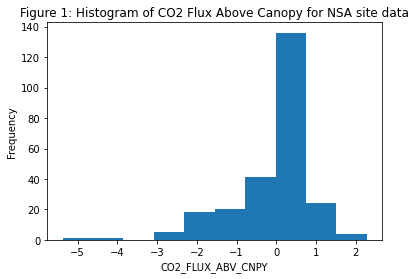

In [31]:
plt.figure()
plt.hist(Select_Tower_Flux_Meter_NSA_OBS['CO2_FLUX_ABV_CNPY'])
plt.xlabel('CO2_FLUX_ABV_CNPY')
plt.ylabel('Frequency')
plt.title('Figure 1: Histogram of CO2 Flux Above Canopy for NSA site data')
plt.show()

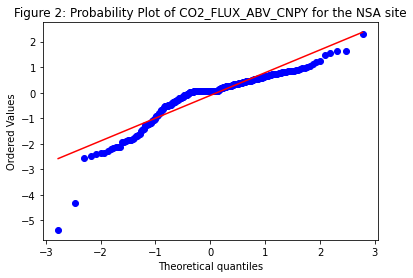

In [32]:
stats.probplot(Select_Tower_Flux_Meter_NSA_OBS['CO2_FLUX_ABV_CNPY'], dist="norm", plot = plt);
plt.title('Figure 2: Probability Plot of CO2_FLUX_ABV_CNPY for the NSA site')
plt.show();

### Checking for outliers and dropping the outliers:

Text(0.5, 1.0, 'Figure 3: CO2 flux above canopy for NSA site data against indices to check for outlier data points')

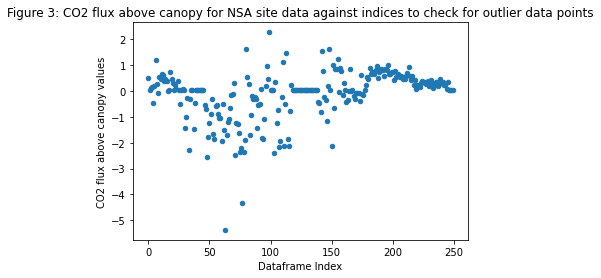

In [33]:
Select_Tower_Flux_Meter_NSA_OBS.reset_index().plot.scatter(x='index', y='CO2_FLUX_ABV_CNPY')
plt.xlabel('Dataframe Index')
plt.ylabel('CO2 flux above canopy values')
plt.title('Figure 3: CO2 flux above canopy for NSA site data against indices to check for outlier data points')

In [34]:
Select_Tower_Flux_Meter_NSA_OBS.drop([63, 77], inplace = True)

### Saving the cleaned and EDA performed dataframe as csv. for later use:

In [35]:
Select_Tower_Flux_Meter_NSA_OBS.to_csv('data/Select_Tower_Flux_Meter_NSA_OBS', sep='\t')

### Working to choose rows and columns from Flux_Meter_SoilTemp_SSA

In [36]:
Select_Tower_Flux_Meter_SSA_OBS=select_columns(Tower_Flux_Meter_SSA_OBS, ['SITE_NAME',
                                                                          'DATE_OBS',
                                                                          'SENSIBLE_HEAT_FLUX_ABV_CNPY', 
                                                                          'LATENT_HEAT_FLUX_ABV_CNPY',
                                                                          'NET_RAD_ABV_CNPY', 
                                                                          'CO2_FLUX_ABV_CNPY', 
                                                                          'CO2_CONC_ABV_CNPY', 
                                                                          'CO2_STORAGE', 
                                                                          'WIND_DIR_ABV_CNPY',
                                                                          'WIND_SPEED_ABV_CNPY',  
                                                                          'FRICTION_VELOC_ABV_CNPY', 
                                                                          'AIR_TEMP_ABV_CNPY',
                                                                          'SOIL_TEMP_10CM',
                                                                          'SOIL_TEMP_100CM',
                                                                          'VAPOR_PRESS_ABV_CNPY',
                                                                          'RAINFALL'])

In [37]:
Select_Tower_Flux_Meter_SSA_OBS = Select_Tower_Flux_Meter_SSA_OBS.rename(columns={'RAINFALL': 'RAIN_RATE','WIND_DIR_ABV_CNPY':'WIND_DIR_MAG_ABV_CNPY'})

In [38]:
Select_Tower_Flux_Meter_SSA_OBS.tail()

SITE_NAME     DATE_OBS  SENSIBLE_HEAT_FLUX_ABV_CNPY  \
17880  SSA-OBS-FLXTR  29-NOV-1996                          NaN   
17881  SSA-OBS-FLXTR  29-NOV-1996                          NaN   
17882  SSA-OBS-FLXTR  29-NOV-1996                          NaN   
17883  SSA-OBS-FLXTR  29-NOV-1996                          NaN   
17884  SSA-OBS-FLXTR  29-NOV-1996                          NaN   

       LATENT_HEAT_FLUX_ABV_CNPY  NET_RAD_ABV_CNPY  CO2_FLUX_ABV_CNPY  \
17880                      4.020               NaN            -0.0792   
17881                     14.339               NaN             0.2942   
17882                      5.219               NaN             0.2732   
17883                      7.770               NaN             1.0238   
17884                      7.970               NaN             0.2589   

       CO2_CONC_ABV_CNPY  CO2_STORAGE  WIND_DIR_MAG_ABV_CNPY  \
17880                NaN          NaN                    NaN   
17881                NaN          NaN                    NaN   
17882                NaN          NaN                    NaN   
17883                NaN          NaN                    NaN   
17884                NaN          NaN                    NaN   

       WIND_SPEED_ABV_CNPY  FRICTION_VELOC_ABV_CNPY  AIR_TEMP_ABV_CNPY  \
17880                1.511                   0.0531                NaN   
17881                1.434                   0.2738                NaN   
17882                1.717                   0.2064                NaN   
17883                1.312                   0.2183                NaN   
17884                1.337                   0.2538                NaN   

       SOIL_TEMP_10CM  SOIL_TEMP_100CM  VAPOR_PRESS_ABV_CNPY  RAIN_RATE  
17880             NaN              NaN                   NaN        NaN  
17881             NaN              NaN                   NaN        NaN  
17882             NaN              NaN                   NaN        NaN  
17883             NaN              NaN                   NaN        NaN  
17884             NaN              NaN                   NaN        NaN

In [39]:
Select_Tower_Flux_Meter_SSA_OBS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17885 entries, 0 to 17884
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SITE_NAME                    17885 non-null  object 
 1   DATE_OBS                     17885 non-null  object 
 2   SENSIBLE_HEAT_FLUX_ABV_CNPY  16682 non-null  float64
 3   LATENT_HEAT_FLUX_ABV_CNPY    17037 non-null  float64
 4   NET_RAD_ABV_CNPY             17593 non-null  float64
 5   CO2_FLUX_ABV_CNPY            17037 non-null  float64
 6   CO2_CONC_ABV_CNPY            17264 non-null  float64
 7   CO2_STORAGE                  17259 non-null  float64
 8   WIND_DIR_MAG_ABV_CNPY        17595 non-null  float64
 9   WIND_SPEED_ABV_CNPY          17801 non-null  float64
 10  FRICTION_VELOC_ABV_CNPY      16906 non-null  float64
 11  AIR_TEMP_ABV_CNPY            17594 non-null  float64
 12  SOIL_TEMP_10CM               17200 non-null  float64
 13  SOIL_TEMP_100CM 

### Changing dtype of 'DATE_OBS' to datetime format

In [40]:
Select_Tower_Flux_Meter_SSA_OBS['DATE_OBS'] = pd.to_datetime(Select_Tower_Flux_Meter_SSA_OBS['DATE_OBS'])

print (Select_Tower_Flux_Meter_SSA_OBS['DATE_OBS'].dtype)

datetime64[ns]


### Unknown values in many of the features were given a value of -999, so dropping rows that have -999 for all features

In [41]:
Select_Tower_Flux_Meter_SSA_OBS.drop(Select_Tower_Flux_Meter_SSA_OBS.index[(Select_Tower_Flux_Meter_SSA_OBS['SENSIBLE_HEAT_FLUX_ABV_CNPY'] == -999)
                                                                     & (Select_Tower_Flux_Meter_SSA_OBS['LATENT_HEAT_FLUX_ABV_CNPY'] == -999)
                                                                     & (Select_Tower_Flux_Meter_SSA_OBS['CO2_FLUX_ABV_CNPY'] == -999)
                                                                     & (Select_Tower_Flux_Meter_SSA_OBS['CO2_CONC_ABV_CNPY']==-999) 
                                                                     & (Select_Tower_Flux_Meter_SSA_OBS['CO2_STORAGE']==-999)
                                                                     & (Select_Tower_Flux_Meter_SSA_OBS['WIND_DIR_MAG_ABV_CNPY']==-999) 
                                                                     & (Select_Tower_Flux_Meter_SSA_OBS['WIND_SPEED_ABV_CNPY']==-999) 
                                                                     & (Select_Tower_Flux_Meter_SSA_OBS['FRICTION_VELOC_ABV_CNPY']==-999) 
                                                                     & (Select_Tower_Flux_Meter_SSA_OBS['AIR_TEMP_ABV_CNPY']==-999) 
                                                                     & (Select_Tower_Flux_Meter_SSA_OBS['SOIL_TEMP_10CM']==-999) 
                                                                     & (Select_Tower_Flux_Meter_SSA_OBS['SOIL_TEMP_100CM']==-999)   
                                                                     & (Select_Tower_Flux_Meter_SSA_OBS['VAPOR_PRESS_ABV_CNPY']==-999)
                                                                     & (Select_Tower_Flux_Meter_SSA_OBS['RAIN_RATE']==-999)], inplace=True)

### In some rows, not all of the features have -999, and those rows weren't dropped, but are replaced with the median values.

In [42]:
Select_Tower_Flux_Meter_SSA_OBS['SENSIBLE_HEAT_FLUX_ABV_CNPY'].replace(to_replace=-999, value = np.median(Select_Tower_Flux_Meter_SSA_OBS['SENSIBLE_HEAT_FLUX_ABV_CNPY']), inplace = True)
Select_Tower_Flux_Meter_SSA_OBS['LATENT_HEAT_FLUX_ABV_CNPY'].replace(to_replace=-999, value = np.median(Select_Tower_Flux_Meter_SSA_OBS['LATENT_HEAT_FLUX_ABV_CNPY']), inplace = True)
Select_Tower_Flux_Meter_SSA_OBS['CO2_FLUX_ABV_CNPY'].replace(to_replace=-999, value = np.median(Select_Tower_Flux_Meter_SSA_OBS['CO2_FLUX_ABV_CNPY']), inplace = True)
Select_Tower_Flux_Meter_SSA_OBS['CO2_CONC_ABV_CNPY'].replace(to_replace=-999, value = np.median(Select_Tower_Flux_Meter_SSA_OBS['CO2_CONC_ABV_CNPY']), inplace = True)
Select_Tower_Flux_Meter_SSA_OBS['CO2_STORAGE'].replace(to_replace=-999, value = np.median(Select_Tower_Flux_Meter_SSA_OBS['CO2_STORAGE']), inplace = True)
Select_Tower_Flux_Meter_SSA_OBS['WIND_DIR_MAG_ABV_CNPY'].replace(to_replace=-999, value = np.median(Select_Tower_Flux_Meter_SSA_OBS['WIND_DIR_MAG_ABV_CNPY']), inplace = True)
Select_Tower_Flux_Meter_SSA_OBS['WIND_SPEED_ABV_CNPY'].replace(to_replace=-999, value = np.median(Select_Tower_Flux_Meter_SSA_OBS['WIND_SPEED_ABV_CNPY']), inplace = True)
Select_Tower_Flux_Meter_SSA_OBS['FRICTION_VELOC_ABV_CNPY'].replace(to_replace=-999, value = np.median(Select_Tower_Flux_Meter_SSA_OBS['FRICTION_VELOC_ABV_CNPY']), inplace = True)
Select_Tower_Flux_Meter_SSA_OBS['AIR_TEMP_ABV_CNPY'].replace(to_replace=-999, value = np.median(Select_Tower_Flux_Meter_SSA_OBS['AIR_TEMP_ABV_CNPY']), inplace = True)
Select_Tower_Flux_Meter_SSA_OBS['SOIL_TEMP_10CM'].replace(to_replace=-999, value = np.median(Select_Tower_Flux_Meter_SSA_OBS['SOIL_TEMP_10CM']), inplace = True)
Select_Tower_Flux_Meter_SSA_OBS['SOIL_TEMP_100CM'].replace(to_replace=-999, value = np.median(Select_Tower_Flux_Meter_SSA_OBS['SOIL_TEMP_100CM']), inplace = True)
Select_Tower_Flux_Meter_SSA_OBS['VAPOR_PRESS_ABV_CNPY'].replace(to_replace=-999, value = np.median(Select_Tower_Flux_Meter_SSA_OBS['VAPOR_PRESS_ABV_CNPY']), inplace = True)
Select_Tower_Flux_Meter_SSA_OBS['RAIN_RATE'].replace(to_replace=-999, value = np.median(Select_Tower_Flux_Meter_SSA_OBS['RAIN_RATE']), inplace = True)

### Grouping the data based on Site_name and Date_Obs as there were multiple values reported in the same day at different times of the day.

In [43]:
Select_Tower_Flux_Meter_SSA_OBS = Select_Tower_Flux_Meter_SSA_OBS.groupby(['SITE_NAME',
                                                                           'DATE_OBS'])['SENSIBLE_HEAT_FLUX_ABV_CNPY', 
                                                                                        'LATENT_HEAT_FLUX_ABV_CNPY',
                                                                                        'NET_RAD_ABV_CNPY', 
                                                                                        'CO2_FLUX_ABV_CNPY', 
                                                                                        'CO2_CONC_ABV_CNPY', 
                                                                                        'CO2_STORAGE', 
                                                                                        'WIND_DIR_MAG_ABV_CNPY',
                                                                                        'WIND_SPEED_ABV_CNPY',  
                                                                                        'FRICTION_VELOC_ABV_CNPY', 
                                                                                        'AIR_TEMP_ABV_CNPY',
                                                                                        'SOIL_TEMP_10CM',
                                                                                        'SOIL_TEMP_100CM',
                                                                                        'VAPOR_PRESS_ABV_CNPY',
                                                                                        'RAIN_RATE'].mean()
Select_Tower_Flux_Meter_SSA_OBS.reset_index(inplace=True)

<ipython-input-43-618d809f71cf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Select_Tower_Flux_Meter_SSA_OBS = Select_Tower_Flux_Meter_SSA_OBS.groupby(['SITE_NAME',


### Splitting the date to year, month and date format to prepare for filter and dropping 'DATE_OBS' column

In [44]:
Select_Tower_Flux_Meter_SSA_OBS.reset_index(drop=True, inplace=True)

# Create new columns
Select_Tower_Flux_Meter_SSA_OBS['DATE'] = Select_Tower_Flux_Meter_SSA_OBS['DATE_OBS'].dt.day
Select_Tower_Flux_Meter_SSA_OBS['MONTH'] = Select_Tower_Flux_Meter_SSA_OBS['DATE_OBS'].dt.month
Select_Tower_Flux_Meter_SSA_OBS['YEAR'] = Select_Tower_Flux_Meter_SSA_OBS['DATE_OBS'].dt.year

In [45]:
Select_Tower_Flux_Meter_SSA_OBS.drop(columns = ['DATE_OBS'], inplace=True)

### Bringing the year, month and date columns to the front of the table

In [46]:
cols = [Select_Tower_Flux_Meter_SSA_OBS.columns[-1]] + [col for col in Select_Tower_Flux_Meter_SSA_OBS if col != Select_Tower_Flux_Meter_SSA_OBS.columns[-1]]
Select_Tower_Flux_Meter_SSA_OBS = Select_Tower_Flux_Meter_SSA_OBS[cols]

In [47]:
cols = [Select_Tower_Flux_Meter_SSA_OBS.columns[-1]] + [col for col in Select_Tower_Flux_Meter_SSA_OBS if col != Select_Tower_Flux_Meter_SSA_OBS.columns[-1]]
Select_Tower_Flux_Meter_SSA_OBS = Select_Tower_Flux_Meter_SSA_OBS[cols]

In [48]:
cols = [Select_Tower_Flux_Meter_SSA_OBS.columns[-1]] + [col for col in Select_Tower_Flux_Meter_SSA_OBS if col != Select_Tower_Flux_Meter_SSA_OBS.columns[-1]]
Select_Tower_Flux_Meter_SSA_OBS = Select_Tower_Flux_Meter_SSA_OBS[cols]

### Checking for null values and filling null values with the corresponding mean

In [49]:
Select_Tower_Flux_Meter_SSA_OBS.sort_values(['YEAR','MONTH','DATE'], ignore_index=True, ascending=True, inplace = True)

In [50]:
Select_Tower_Flux_Meter_SSA_OBS = Select_Tower_Flux_Meter_SSA_OBS[Select_Tower_Flux_Meter_SSA_OBS['YEAR'] == 1994] 

In [51]:
Select_Tower_Flux_Meter_SSA_OBS.isna().sum()

DATE                            0
MONTH                           0
YEAR                            0
SITE_NAME                       0
SENSIBLE_HEAT_FLUX_ABV_CNPY     0
LATENT_HEAT_FLUX_ABV_CNPY       0
NET_RAD_ABV_CNPY                0
CO2_FLUX_ABV_CNPY               1
CO2_CONC_ABV_CNPY              11
CO2_STORAGE                    11
WIND_DIR_MAG_ABV_CNPY           0
WIND_SPEED_ABV_CNPY             0
FRICTION_VELOC_ABV_CNPY         0
AIR_TEMP_ABV_CNPY               0
SOIL_TEMP_10CM                  3
SOIL_TEMP_100CM                 3
VAPOR_PRESS_ABV_CNPY            0
RAIN_RATE                       3
dtype: int64

In [52]:
print('The column "CO2_FLUX_ABV_CNPY" has 1 null value which is going to be replaced with the pd mean value:', Select_Tower_Flux_Meter_SSA_OBS['CO2_FLUX_ABV_CNPY'].mean())
Select_Tower_Flux_Meter_SSA_OBS['CO2_FLUX_ABV_CNPY'].fillna(Select_Tower_Flux_Meter_SSA_OBS['CO2_FLUX_ABV_CNPY'].mean(), inplace = True)

The column "CO2_FLUX_ABV_CNPY" has 1 null value which is going to be replaced with the pd mean value: -1.570380138124827


In [53]:
print('The column "CO2_CONC_ABV_CNPY" has 11 null values which are going to be replaced with the pd mean value:', Select_Tower_Flux_Meter_SSA_OBS['CO2_CONC_ABV_CNPY'].mean())
Select_Tower_Flux_Meter_SSA_OBS['CO2_CONC_ABV_CNPY'].fillna(Select_Tower_Flux_Meter_SSA_OBS['CO2_CONC_ABV_CNPY'].mean(), inplace = True)

The column "CO2_CONC_ABV_CNPY" has 11 null values which are going to be replaced with the pd mean value: 360.54041794159826


In [54]:
print('The column "CO2_STORAGE" has 11 null values which are going to be replaced with the pd mean value:', Select_Tower_Flux_Meter_SSA_OBS['CO2_STORAGE'].mean())
Select_Tower_Flux_Meter_SSA_OBS['CO2_STORAGE'].fillna(Select_Tower_Flux_Meter_SSA_OBS['CO2_STORAGE'].mean(), inplace = True)

The column "CO2_STORAGE" has 11 null values which are going to be replaced with the pd mean value: 0.0204397750717574


In [55]:
print('The column "SOIL_TEMP_10CM" has 3 null values which are going to be replaced with the pd mean value:', Select_Tower_Flux_Meter_SSA_OBS['SOIL_TEMP_10CM'].mean())
Select_Tower_Flux_Meter_SSA_OBS['SOIL_TEMP_10CM'].fillna(Select_Tower_Flux_Meter_SSA_OBS['SOIL_TEMP_10CM'].mean(), inplace = True)

The column "SOIL_TEMP_10CM" has 3 null values which are going to be replaced with the pd mean value: 8.067875930392171


In [56]:
print('The column "SOIL_TEMP_100CM" has 3 null values which are going to be replaced with the pd mean value:', Select_Tower_Flux_Meter_SSA_OBS['SOIL_TEMP_100CM'].mean())
Select_Tower_Flux_Meter_SSA_OBS['SOIL_TEMP_100CM'].fillna(Select_Tower_Flux_Meter_SSA_OBS['SOIL_TEMP_100CM'].mean(), inplace = True)

The column "SOIL_TEMP_100CM" has 3 null values which are going to be replaced with the pd mean value: 3.80868210086995


In [57]:
print('The column "RAIN_RATE" has 3 null values which are going to be replaced with the pd mean value:', Select_Tower_Flux_Meter_SSA_OBS['RAIN_RATE'].mean())
Select_Tower_Flux_Meter_SSA_OBS['RAIN_RATE'].fillna(Select_Tower_Flux_Meter_SSA_OBS['RAIN_RATE'].mean(), inplace = True)

The column "RAIN_RATE" has 3 null values which are going to be replaced with the pd mean value: 0.03543180878174338


### Checking the stats summary and performing EDA

In [58]:
Select_Tower_Flux_Meter_SSA_OBS.describe()

DATE       MONTH    YEAR  SENSIBLE_HEAT_FLUX_ABV_CNPY  \
count  122.000000  122.000000   122.0                   122.000000   
mean    15.827869    7.204918  1994.0                    64.089191   
std      8.932893    1.205624     0.0                    40.938853   
min      1.000000    5.000000  1994.0                   -24.685917   
25%      8.000000    6.000000  1994.0                    39.164292   
50%     16.000000    7.000000  1994.0                    55.783851   
75%     23.750000    8.000000  1994.0                    92.045438   
max     31.000000    9.000000  1994.0                   205.876692   

       LATENT_HEAT_FLUX_ABV_CNPY  NET_RAD_ABV_CNPY  CO2_FLUX_ABV_CNPY  \
count                 122.000000        122.000000         122.000000   
mean                   56.111676        103.981369          -1.570380   
std                    23.191788        163.211809           1.750091   
min                    -0.270417       -977.750625         -14.040000   
25%                    42.848070         89.302812          -2.367226   
50%                    56.245208        129.011562          -1.505028   
75%                    68.341719        170.860000          -0.719010   
max                   163.481538        237.974375           2.072083   

       CO2_CONC_ABV_CNPY  CO2_STORAGE  WIND_DIR_MAG_ABV_CNPY  \
count         122.000000   122.000000             122.000000   
mean          360.540418     0.020440             197.640446   
std             6.413252     0.166252              74.305379   
min           338.354000    -0.572353              46.331250   
25%           357.665938    -0.037481             132.133281   
50%           360.540418     0.010000             201.715104   
75%           363.678958     0.047891             260.458385   
max           377.875833     0.987500             328.375000   

       WIND_SPEED_ABV_CNPY  FRICTION_VELOC_ABV_CNPY  AIR_TEMP_ABV_CNPY  \
count           122.000000               122.000000         122.000000   
mean              2.821681                 0.339590          14.712060   
std               0.991331                 0.144670           3.827337   
min               0.813125                 0.062500           3.649167   
25%               2.026302                 0.239430          12.597240   
50%               2.749792                 0.307917          14.689663   
75%               3.455729                 0.420677          17.031719   
max               5.630000                 0.730000          22.888333   

       SOIL_TEMP_10CM  SOIL_TEMP_100CM  VAPOR_PRESS_ABV_CNPY   RAIN_RATE  
count      122.000000       122.000000            122.000000  122.000000  
mean         8.067876         3.808682              1.092966    0.035432  
std          3.215534         2.616325              0.262479    0.114341  
min          1.043750         0.000000              0.639384    0.000000  
25%          6.930295         1.237031              0.878736    0.000000  
50%          8.650104         5.157083              1.081481    0.000000  
75%         10.366458         6.230990              1.296186    0.019792  
max         13.521667         6.629583              1.780213    1.029167

### Checking for normal distribution via histogram and Q-Q plot:

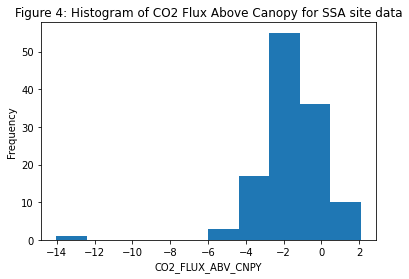

In [59]:
plt.figure()
plt.hist(Select_Tower_Flux_Meter_SSA_OBS['CO2_FLUX_ABV_CNPY'])
plt.xlabel('CO2_FLUX_ABV_CNPY')
plt.ylabel('Frequency')
plt.title('Figure 4: Histogram of CO2 Flux Above Canopy for SSA site data')
plt.show()

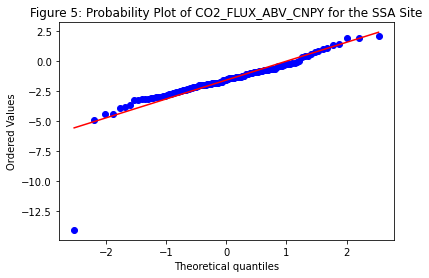

In [60]:
stats.probplot(Select_Tower_Flux_Meter_SSA_OBS['CO2_FLUX_ABV_CNPY'], dist="norm", plot = plt);
plt.title('Figure 5: Probability Plot of CO2_FLUX_ABV_CNPY for the SSA Site')
plt.show();

### Checking for outliers and dropping the outliers:

Text(0.5, 1.0, 'Figure 6: CO2 flux above canopy for SSA site data against indices to check for outlier data points')

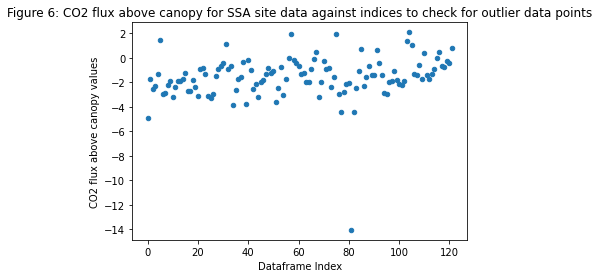

In [61]:
Select_Tower_Flux_Meter_SSA_OBS.reset_index().plot.scatter(x='index', y='CO2_FLUX_ABV_CNPY')
plt.xlabel('Dataframe Index')
plt.ylabel('CO2 flux above canopy values')
plt.title('Figure 6: CO2 flux above canopy for SSA site data against indices to check for outlier data points')

In [62]:
Select_Tower_Flux_Meter_SSA_OBS.drop([81], inplace = True)

### Saving the cleaned and EDA performed dataframe as csv. for later use:

In [63]:
Select_Tower_Flux_Meter_SSA_OBS.to_csv('data/Select_Tower_Flux_Meter_SSA_OBS', sep='\t')

### Appending the 'Select_Tower_Flux_Meter_SSA_OBS' to the 'Select_Tower_Flux_Meter_NSA_OBS' to convert into a single dataframe to fit the model.

In [64]:
Select_Tower_Flux_Meter_Both_OBS=Select_Tower_Flux_Meter_NSA_OBS.append(Select_Tower_Flux_Meter_SSA_OBS)
Select_Tower_Flux_Meter_Both_OBS.reset_index(drop=True, inplace=True)

In [65]:
print(f'Total number of rows after appending the two files together should be (250 rows from NSA +122 rows from SSA - 3 rows dropped as outliers): {Select_Tower_Flux_Meter_Both_OBS.shape}')

Total number of rows after appending the two files together should be (250 rows from NSA +122 rows from SSA - 3 rows dropped as outliers): (369, 18)


### Saving the NSA and SSA flux and storage above canopy combined data csv file for which the model shall be fit:

In [66]:
Select_Tower_Flux_Meter_Both_OBS.to_csv('data/Select_Tower_Flux_Meter_Both_OBS', sep='\t')

### Reading the combined data file and performing EDA to pick key parameters for further analysis:

In [67]:
Select_Tower_Flux_Meter_Both_OBS_data = pd.read_csv('data/Select_Tower_Flux_Meter_Both_OBS',sep='\t')

In [68]:
Select_Tower_Flux_Meter_Both_OBS_data.head()

Unnamed: 0  DATE  MONTH  YEAR      SITE_NAME  SENSIBLE_HEAT_FLUX_ABV_CNPY  \
0           0    17      3  1994  NSA-OBS-FLXTR                    -8.585286   
1           1    18      3  1994  NSA-OBS-FLXTR                    19.734979   
2           2    19      3  1994  NSA-OBS-FLXTR                     2.431104   
3           3    20      3  1994  NSA-OBS-FLXTR                    -4.663521   
4           4    21      3  1994  NSA-OBS-FLXTR                    37.187896   

   LATENT_HEAT_FLUX_ABV_CNPY  NET_RAD_ABV_CNPY  CO2_FLUX_ABV_CNPY  \
0                   5.421667          8.450238           0.505929   
1                  15.867354         63.222500           0.050479   
2                  15.244500         35.612500           0.135188   
3                  11.735708         29.920000           0.167625   
4                  19.978917         57.282500          -0.469667   

   CO2_CONC_ABV_CNPY  CO2_STORAGE  WIND_DIR_MAG_ABV_CNPY  WIND_SPEED_ABV_CNPY  \
0         362.417286     0.005952             110.619048             4.006905   
1         362.282729     0.014583              98.062500             3.448333   
2         362.900875     0.016667              93.875000             3.209583   
3         363.434188     0.035208              91.666667             3.775833   
4         363.409187     0.000417             237.104167             3.175208   

   FRICTION_VELOC_ABV_CNPY  AIR_TEMP_ABV_CNPY  SOIL_TEMP_10CM  \
0                 0.530476          -8.476452         -0.2185   
1                 0.465063          -7.715458         -0.2185   
2                 0.353042         -10.283875         -0.2185   
3                 0.452708          -8.604250         -0.2185   
4                 0.380979          -9.666958         -0.2185   

   SOIL_TEMP_100CM  VAPOR_PRESS_ABV_CNPY  RAIN_RATE  
0            0.025              0.262498   0.114286  
1            0.025              0.315046   0.020833  
2            0.025              0.221442   0.004167  
3            0.025              0.288858   0.262500  
4            0.025              0.276713   0.004167

In [69]:
Select_Tower_Flux_Meter_Both_OBS_data.isna().sum()

Unnamed: 0                     0
DATE                           0
MONTH                          0
YEAR                           0
SITE_NAME                      0
SENSIBLE_HEAT_FLUX_ABV_CNPY    0
LATENT_HEAT_FLUX_ABV_CNPY      0
NET_RAD_ABV_CNPY               0
CO2_FLUX_ABV_CNPY              0
CO2_CONC_ABV_CNPY              0
CO2_STORAGE                    0
WIND_DIR_MAG_ABV_CNPY          0
WIND_SPEED_ABV_CNPY            0
FRICTION_VELOC_ABV_CNPY        0
AIR_TEMP_ABV_CNPY              0
SOIL_TEMP_10CM                 0
SOIL_TEMP_100CM                0
VAPOR_PRESS_ABV_CNPY           0
RAIN_RATE                      0
dtype: int64

### Pair plots between the Sensible and Latent Heat Flux with the target variables which are CO2 Flux and Storage above the Canopy Cover

Text(0.5, 0.98, 'Figure 7: Pair Plots of Sensible and Latent Heat Flux with the CO2 Flux and concentration above the canopy cover for the combined data')

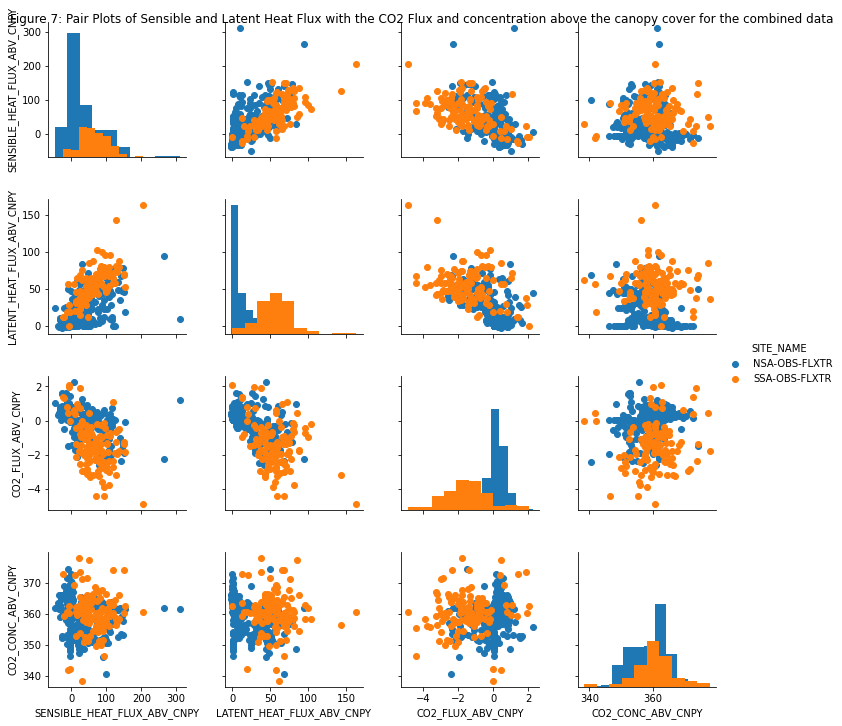

In [70]:
g = sns.PairGrid(Select_Tower_Flux_Meter_Both_OBS_data, vars=['SENSIBLE_HEAT_FLUX_ABV_CNPY', 'LATENT_HEAT_FLUX_ABV_CNPY', 
                                                              'CO2_FLUX_ABV_CNPY', 'CO2_CONC_ABV_CNPY'], hue="SITE_NAME" )
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
g.fig.suptitle("Figure 7: Pair Plots of Sensible and Latent Heat Flux with the CO2 Flux and concentration above the canopy cover for the combined data")

### Plotting the linear relationship between Latent Heat Flux and the CO2 Flux above the canaopy before I remove the 'SITE_NAME' column (used here to distinguish between sites) to fit the model 

In [71]:
# g = sns.lmplot(x='LATENT_HEAT_FLUX_ABV_CNPY', y='CO2_FLUX_ABV_CNPY', hue='SITE_NAME', legend_out = False, 
#                data=Select_Tower_Flux_Meter_Both_OBS_data)

In [72]:
import plotly.express as px


fig = px.scatter(Select_Tower_Flux_Meter_Both_OBS_data, x='LATENT_HEAT_FLUX_ABV_CNPY', y='CO2_FLUX_ABV_CNPY', 
                 color='SITE_NAME', color_discrete_sequence=[ "blue", "orange"], trendline="ols", title = 'Figure 8: Linear Regression Fit for the CO2 Flux Above Canopy',
                 labels={"LATENT_HEAT_FLUX_ABV_CNPY": "Latent Heat Flux Above Canopy (Watts/sq.m)",
                     "CO2_FLUX_ABV_CNPY": "CO2 Flux Above Canopy (micromoles/sq.m/s)",
                     "SITE_NAME": "Site Names"
                 })

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.95
))
fig.show()

### Plotting the linear relationship between Latent Heat Flux and the CO2 Concentration above the canaopy before I remove the 'SITE_NAME' column (used here to distinguish between sites) to fit the model 

In [73]:
# g = sns.lmplot(x='SENSIBLE_HEAT_FLUX_ABV_CNPY', y='CO2_CONC_ABV_CNPY', hue='SITE_NAME', legend_out = False, 
#                data=Select_Tower_Flux_Meter_Both_OBS_data)

In [74]:
import plotly.express as px


fig = px.scatter(Select_Tower_Flux_Meter_Both_OBS_data, x='LATENT_HEAT_FLUX_ABV_CNPY', y='CO2_CONC_ABV_CNPY', 
                 color='SITE_NAME', color_discrete_sequence=[ "blue", "orange"], trendline="ols", title = 'Figure 9: Linear Regression Fit for the CO2 Concentration Above Canopy', 
                 labels={"LATENT_HEAT_FLUX_ABV_CNPY": "Latent Heat Flux Above Canopy (Watts/sq.m)",
                     "CO2_CONC_ABV_CNPY": "CO2 Concentration Above Canopy (micromoles/sq.m/s)",
                     "SITE_NAME": "Site Names"
                 })
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.95
))
fig.show()

In [75]:
# g = sns.lmplot(x='SENSIBLE_HEAT_FLUX_ABV_CNPY', y='CO2_FLUX_ABV_CNPY', hue='SITE_NAME', 
#                data=Select_Tower_Flux_Meter_Both_OBS_data)

In [76]:
# x, y = pd.Series(Select_Tower_Flux_Meter_Both_OBS_data['SENSIBLE_HEAT_FLUX_ABV_CNPY'], name="Sensible Heat Flux"), pd.Series(Select_Tower_Flux_Meter_Both_OBS_data['CO2_FLUX_ABV_CNPY'], name="CO2 Flux Above Canopy")
# ax = sns.regplot(x=x, y=y, marker="+")

### Dropping the text and date and extra index columns to reduce confusion while fitting the model

In [77]:
#For modelling purposes, will drop the first 4 columns and 'SUB_SITE'

Select_Tower_Flux_Meter_Both_OBS_data.drop(columns = ['Unnamed: 0','DATE','MONTH','YEAR','SITE_NAME'], inplace=True)

In [78]:
Select_Tower_Flux_Meter_Both_OBS_data.columns

Index(['SENSIBLE_HEAT_FLUX_ABV_CNPY', 'LATENT_HEAT_FLUX_ABV_CNPY',
       'NET_RAD_ABV_CNPY', 'CO2_FLUX_ABV_CNPY', 'CO2_CONC_ABV_CNPY',
       'CO2_STORAGE', 'WIND_DIR_MAG_ABV_CNPY', 'WIND_SPEED_ABV_CNPY',
       'FRICTION_VELOC_ABV_CNPY', 'AIR_TEMP_ABV_CNPY', 'SOIL_TEMP_10CM',
       'SOIL_TEMP_100CM', 'VAPOR_PRESS_ABV_CNPY', 'RAIN_RATE'],
      dtype='object')

### Checking for normal distribution via histogram and Q-Q plot:

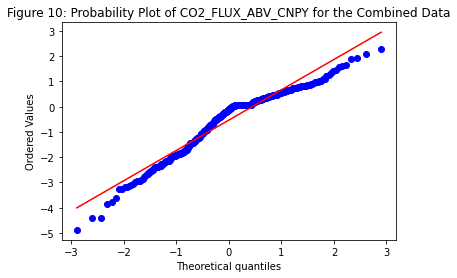

In [79]:
stats.probplot(Select_Tower_Flux_Meter_Both_OBS_data['CO2_FLUX_ABV_CNPY'], dist="norm", plot = plt);
plt.title('Probability Plot of CO2_FLUX_ABV_CNPY')
plt.title('Figure 10: Probability Plot of CO2_FLUX_ABV_CNPY for the Combined Data')
plt.show();

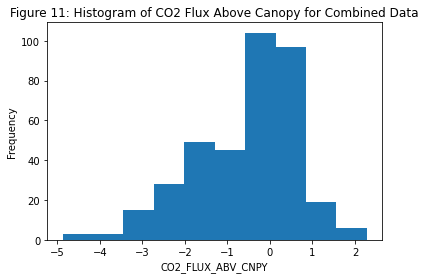

In [80]:
plt.figure()
plt.hist(Select_Tower_Flux_Meter_Both_OBS_data['CO2_FLUX_ABV_CNPY'])
plt.xlabel('CO2_FLUX_ABV_CNPY')
plt.ylabel('Frequency')
plt.title('Figure 11: Histogram of CO2 Flux Above Canopy for Combined Data')
plt.show()

### Defining dependent ('y') and independent variables

In [81]:
y = Select_Tower_Flux_Meter_Both_OBS_data['CO2_FLUX_ABV_CNPY']
X = Select_Tower_Flux_Meter_Both_OBS_data.drop(['CO2_FLUX_ABV_CNPY'], axis =1)

## Fitting the Linear Regression Model:

In [82]:
X_withconstant = sm.add_constant(X)

In [83]:
# 1. Instantiate model
lm_CO2_Flux = sm.OLS(y, X_withconstant)

# 2. Fit model
lm_CO2_Flux_results = lm_CO2_Flux.fit()

lm_CO2_Flux_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      CO2_FLUX_ABV_CNPY   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     29.66
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           5.28e-49
Time:                        11:54:12   Log-Likelihood:                -462.60
No. Observations:                 369   AIC:                             953.2
Df Residuals:                     355   BIC:                             1008.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -11.5386      3.421     -3.373      0.001     -18.266      -4.812
SENSIBLE_HEAT_FLUX_ABV_CNPY    -0.0027      0.002     -1.732      0.084      -0.006       0.000
LATENT_HEAT_FLUX_ABV_CNPY      -0.0242      0.003     -8.394      0.000      -0.030      -0.019
NET_RAD_ABV_CNPY               -0.0011      0.000     -2.273      0.024      -0.002      -0.000
CO2_CONC_ABV_CNPY               0.0298      0.009      3.148      0.002       0.011       0.048
CO2_STORAGE                     0.0732      0.294      0.249      0.803      -0.504       0.651
WIND_DIR_MAG_ABV_CNPY           0.0011      0.001      1.546      0.123      -0.000       0.002
WIND_SPEED_ABV_CNPY             0.2121      0.116      1.824      0.069      -0.017       0.441
FRICTION_VELOC_ABV_CNPY         0.1149      0.767      0.150      0.881      -1.393       1.623
AIR_TEMP_ABV_CNPY              -0.0151      0.010     -1.547      0.123      -0.034       0.004
SOIL_TEMP_10CM                  0.0630      0.019      3.260      0.001       0.025       0.101
SOIL_TEMP_100CM                -0.0727      0.027     -2.700      0.007      -0.126      -0.020
VAPOR_PRESS_ABV_CNPY            0.3310      0.276      1.199      0.231      -0.212       0.874
RAIN_RATE                       0.5573      0.617      0.903      0.367      -0.656       1.771
==============================================================================
Omnibus:                        8.757   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               12.425
Skew:                          -0.174   Prob(JB):                      0.00200
Kurtosis:                       3.829   Cond. No.                     3.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model summary from the linear regression shows the R2 score is about 52.1%. In the next step, will be checking for colinearity via variance inflation factor (VIF).

In [84]:
corr_CO2_FLUX_ABV_CNPY= round(Select_Tower_Flux_Meter_Both_OBS_data.corrwith(Select_Tower_Flux_Meter_Both_OBS_data['CO2_FLUX_ABV_CNPY']),3)
corr_CO2_FLUX_ABV_CNPY

SENSIBLE_HEAT_FLUX_ABV_CNPY   -0.547
LATENT_HEAT_FLUX_ABV_CNPY     -0.634
NET_RAD_ABV_CNPY              -0.352
CO2_FLUX_ABV_CNPY              1.000
CO2_CONC_ABV_CNPY              0.095
CO2_STORAGE                    0.040
WIND_DIR_MAG_ABV_CNPY         -0.019
WIND_SPEED_ABV_CNPY            0.312
FRICTION_VELOC_ABV_CNPY        0.215
AIR_TEMP_ABV_CNPY             -0.386
SOIL_TEMP_10CM                -0.230
SOIL_TEMP_100CM               -0.234
VAPOR_PRESS_ABV_CNPY          -0.281
RAIN_RATE                      0.147
dtype: float64

In [85]:
High_significance_X = abs(corr_CO2_FLUX_ABV_CNPY)
High_significance_X = High_significance_X[High_significance_X>0.5]
High_significance_X

SENSIBLE_HEAT_FLUX_ABV_CNPY    0.547
LATENT_HEAT_FLUX_ABV_CNPY      0.634
CO2_FLUX_ABV_CNPY              1.000
dtype: float64

**The correlation coefficient for the sensible and latent heat flux is higher than 0.5, hence dropping both variables to check if colinearity can be reduced and R2 score can be improved**

In [86]:
y = Select_Tower_Flux_Meter_Both_OBS_data['CO2_FLUX_ABV_CNPY']
X1 = Select_Tower_Flux_Meter_Both_OBS_data.drop(['CO2_FLUX_ABV_CNPY','SENSIBLE_HEAT_FLUX_ABV_CNPY','LATENT_HEAT_FLUX_ABV_CNPY'], axis =1)

In [87]:
X1_withconstant = sm.add_constant(X1)

In [88]:
# 1. Instantiate model
lm_CO2_Flux = sm.OLS(y, X1_withconstant)

# 2. Fit model
lm_CO2_Flux_results = lm_CO2_Flux.fit()

lm_CO2_Flux_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      CO2_FLUX_ABV_CNPY   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     16.17
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           9.49e-26
Time:                        11:54:12   Log-Likelihood:                -523.69
No. Observations:                 369   AIC:                             1071.
Df Residuals:                     357   BIC:                             1118.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -6.9885      3.981     -1.756      0.080     -14.818       0.840
NET_RAD_ABV_CNPY           -0.0026      0.001     -4.934      0.000      -0.004      -0.002
CO2_CONC_ABV_CNPY           0.0167      0.011      1.516      0.130      -0.005       0.038
CO2_STORAGE                 0.2332      0.344      0.678      0.498      -0.443       0.910
WIND_DIR_MAG_ABV_CNPY      -0.0002      0.001     -0.264      0.792      -0.002       0.001
WIND_SPEED_ABV_CNPY         0.5078      0.130      3.914      0.000       0.253       0.763
FRICTION_VELOC_ABV_CNPY    -1.9417      0.855     -2.271      0.024      -3.623      -0.261
AIR_TEMP_ABV_CNPY          -0.0551      0.010     -5.307      0.000      -0.076      -0.035
SOIL_TEMP_10CM              0.0845      0.023      3.732      0.000       0.040       0.129
SOIL_TEMP_100CM            -0.1196      0.031     -3.851      0.000      -0.181      -0.059
VAPOR_PRESS_ABV_CNPY        0.0028      0.299      0.009      0.993      -0.584       0.590
RAIN_RATE                   1.1297      0.723      1.562      0.119      -0.293       2.552
==============================================================================
Omnibus:                       77.983   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.529
Skew:                          -0.919   Prob(JB):                     2.67e-57
Kurtosis:                       6.683   Cond. No.                     3.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The correlation coefficient for the sensible and latent heat flux is higher than 0.5, but these two vairables are of significance to study as per literature references to predict the trends in the CO2 Flux and Storage and removing them brings down the R2 score to less than 33.3 %. Hence, checking if we drop other variables that have correlation coefficient closer to 0.5 would help improve the R2 score.**

In [89]:
y = Select_Tower_Flux_Meter_Both_OBS_data['CO2_FLUX_ABV_CNPY']
X2 = Select_Tower_Flux_Meter_Both_OBS_data.drop(['CO2_FLUX_ABV_CNPY','NET_RAD_ABV_CNPY','AIR_TEMP_ABV_CNPY'], axis =1)

In [90]:
X2_withconstant = sm.add_constant(X2)

In [91]:
# 1. Instantiate model
lm_CO2_Flux = sm.OLS(y, X2_withconstant)

# 2. Fit model
lm_CO2_Flux_results = lm_CO2_Flux.fit()

lm_CO2_Flux_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      CO2_FLUX_ABV_CNPY   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     33.88
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           5.29e-49
Time:                        11:54:12   Log-Likelihood:                -466.37
No. Observations:                 369   AIC:                             956.7
Df Residuals:                     357   BIC:                             1004.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -10.7291      3.367     -3.186      0.002     -17.351      -4.107
SENSIBLE_HEAT_FLUX_ABV_CNPY    -0.0046      0.001     -3.302      0.001      -0.007      -0.002
LATENT_HEAT_FLUX_ABV_CNPY      -0.0243      0.003     -8.379      0.000      -0.030      -0.019
CO2_CONC_ABV_CNPY               0.0278      0.009      2.991      0.003       0.010       0.046
CO2_STORAGE                     0.0969      0.294      0.330      0.742      -0.481       0.675
WIND_DIR_MAG_ABV_CNPY           0.0012      0.001      1.762      0.079      -0.000       0.003
WIND_SPEED_ABV_CNPY             0.1999      0.117      1.716      0.087      -0.029       0.429
FRICTION_VELOC_ABV_CNPY         0.2407      0.769      0.313      0.755      -1.272       1.754
SOIL_TEMP_10CM                  0.0449      0.018      2.471      0.014       0.009       0.081
SOIL_TEMP_100CM                -0.0568      0.026     -2.145      0.033      -0.109      -0.005
VAPOR_PRESS_ABV_CNPY            0.1029      0.242      0.425      0.671      -0.373       0.579
RAIN_RATE                       0.7170      0.615      1.166      0.244      -0.492       1.926
==============================================================================
Omnibus:                        9.304   Durbin-Watson:                   1.080
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               13.543
Skew:                          -0.178   Prob(JB):                      0.00115
Kurtosis:                       3.868   Cond. No.                     3.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Removing the Net radiation and Air temperature variable measurements, doesn't affect the R2 as much as it would when the Sensible and Latent Heat Flux are removed.**

In [92]:
vif = pd.DataFrame()
vif["Columns"] = X.columns
vif["VIF Values"] = [VIF(X.values, i) for i in range(X.shape[1])]

In [93]:
vif.round(1)

Columns  VIF Values
0   SENSIBLE_HEAT_FLUX_ABV_CNPY         5.1
1     LATENT_HEAT_FLUX_ABV_CNPY         7.2
2              NET_RAD_ABV_CNPY         2.1
3             CO2_CONC_ABV_CNPY        32.0
4                   CO2_STORAGE         1.1
5         WIND_DIR_MAG_ABV_CNPY         9.3
6           WIND_SPEED_ABV_CNPY        73.9
7       FRICTION_VELOC_ABV_CNPY        46.3
8             AIR_TEMP_ABV_CNPY         8.0
9                SOIL_TEMP_10CM         7.8
10              SOIL_TEMP_100CM         2.4
11         VAPOR_PRESS_ABV_CNPY        29.4
12                    RAIN_RATE         1.3

#### Also, the VIF for all independent variables seems to be quiet low, which means that none of the features cause colinearity that could affect the R2. Now, checking the residuals and the fitted values to see if model prediction is normal.

In [94]:
model_resids = lm_CO2_Flux_results.resid # this is where the residuals are stored

model_fittedvals = lm_CO2_Flux_results.fittedvalues # this is where the fitted values are stored

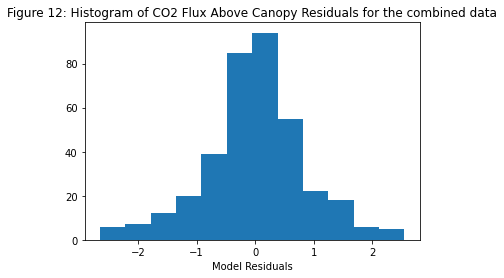

In [95]:
plt.figure()
plt.hist(model_resids,bins = 12)
plt.title('CO2 Flux Above Canopy Residuals')
plt.xlabel('Model Residuals')
plt.title('Figure 12: Histogram of CO2 Flux Above Canopy Residuals for the combined data')
plt.show()

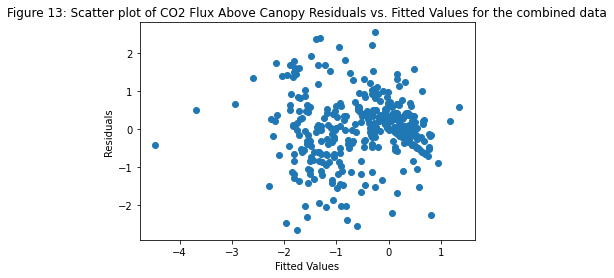

In [96]:
plt.figure()
plt.scatter(model_fittedvals,model_resids)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Figure 13: Scatter plot of CO2 Flux Above Canopy Residuals vs. Fitted Values for the combined data')
plt.show()

**The residuals histogram shows a normal distribution and the fitted values plotted against the residuals indicate that the model could capture the trends better, but might be hindered due to existing noise**

### Now using Sklearn to perform PCA to check if colinearity can be reduced by reducing dimensionality of the independent variables.

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Reload the fraud data
y_flux = Select_Tower_Flux_Meter_Both_OBS_data['CO2_FLUX_ABV_CNPY']
X_flux = Select_Tower_Flux_Meter_Both_OBS_data.drop(['CO2_FLUX_ABV_CNPY'], axis =1)

### Splitting into test and train datasets:

In [98]:
X_flux_train, X_flux_test, y_flux_train, y_flux_test = train_test_split(X_flux, y_flux, shuffle = True, test_size = 0.33, random_state=42)

In [99]:
X_flux_train.shape

(247, 13)

In [100]:
y_flux_train.shape

(247,)

### Applying PCA including all components of the model

In [101]:
my_PCA = PCA(n_components=13, random_state=None)

X_flux_train_pca = my_PCA.fit_transform(X_flux_train)

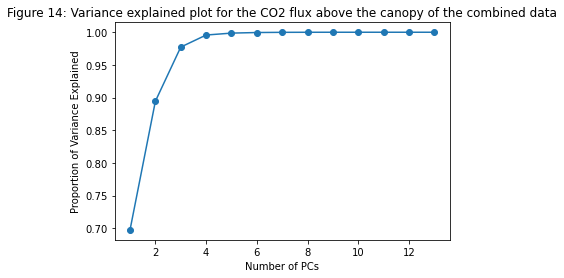

In [102]:
explained_variance_cum = my_PCA.explained_variance_ratio_.cumsum()

plt.figure()
plt.plot(range(1,14), explained_variance_cum)
plt.scatter(range(1,14), explained_variance_cum)
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.title('Figure 14: Variance explained plot for the CO2 flux above the canopy of the combined data')
plt.show()

**The explained variance ratio of the model indicates that the R2 can be >90% even with just n_components > 4, so keeping just 4 components to verify.**

In [103]:
my_PCA = PCA(n_components=4, random_state=42)

X_flux_train_pca = my_PCA.fit_transform(X_flux_train)
my_PCA

PCA(n_components=4, random_state=42)

In [104]:
my_PCA.explained_variance_ratio_

array([0.69745844, 0.19694635, 0.08287329, 0.01845027])

#### The explained vairance ratio shows that it is possible to get an R2 of 0.99 with just 4 components, so will be fitting the model with the transformed independent variable matrix

In [105]:
from sklearn.linear_model import LinearRegression
# 1. Instantiate the model
linear_regression_model = LinearRegression()

In [106]:
# 2. Fit the model
flux_model= linear_regression_model.fit(X_flux_train_pca, y_flux_train)

In [107]:
#The intercept
intercept = flux_model.intercept_

#The coefficient, notice it returns an array with one spot for each feature
coefficient = flux_model.coef_[0]

print(f'Intercept: {intercept}')
print(f'Coefficients:{coefficient}')

Intercept: -0.5173831941475211
Coefficients:0.003047901521022292


In [108]:
model_prediction = linear_regression_model.predict(X_flux_train_pca)

In [109]:
from sklearn.metrics import r2_score

# Evaluate the model on each set
print(f'The R2 score on the training set: {r2_score(y_flux_train, model_prediction)}')

The R2 score on the training set: 0.4208050574337133


#### But, with the transformed X's, the model R2 score doesn't seem to increase and hence increasing the number of components to 10 and determining the R2 again.

In [110]:
my_PCA = PCA(n_components=10, random_state=42)

X_flux_train_pca = my_PCA.fit_transform(X_flux_train)
my_PCA

PCA(n_components=10, random_state=42)

In [111]:
my_PCA.explained_variance_ratio_

array([6.97458436e-01, 1.96946351e-01, 8.28732915e-02, 1.84502718e-02,
       2.94517253e-03, 8.91327939e-04, 3.02789983e-04, 9.28695277e-05,
       3.72669545e-05, 1.18786157e-06])

In [112]:
from sklearn.linear_model import LinearRegression
# 1. Instantiate the model
linear_regression_model = LinearRegression()

In [113]:
# 2. Fit the model
flux_model= linear_regression_model.fit(X_flux_train_pca, y_flux_train)

In [114]:
#The intercept
intercept = flux_model.intercept_

#The coefficient, notice it returns an array with one spot for each feature
coefficient = flux_model.coef_[0]

print(f'Intercept: {intercept}')
print(f'Coefficients:{coefficient}')

Intercept: -0.5173831941475212
Coefficients:0.003047901521022292


In [115]:
model_prediction = linear_regression_model.predict(X_flux_train_pca)

In [116]:
from sklearn.metrics import r2_score

# Evaluate the model on each set
print(f'The R2 score on the training set: {r2_score(y_flux_train, model_prediction)}')

The R2 score on the training set: 0.52872477146885


#### The R2 score increased to the original value of ~0.53, which means to say though the model seems to be predicting the trend, its still unable to capture the full trends. Hence, moving on to check the cross-validation score:

In [117]:
# Taking a chuck for our 20% test set
X_flux_remainder, X_flux_test, y_flux_remainder, y_flux_test = train_test_split(X_flux, y_flux, test_size = 0.2, shuffle=True, random_state=1)

In [118]:
# Splitting the remainder in two chunks
X_flux_train, X_flux_validation, y_flux_train, y_flux_validation = train_test_split(X_flux_remainder, y_flux_remainder, test_size = 0.3, shuffle=True, random_state=1)

In [119]:
# # split into X and y for both train and test sets
# # reshaping is required since sklearn requires the data to be in shape
# # (n, 1), not as a series of shape (n, )
# X_flux_train = Select_Tower_Flux_Meter_Both_OBS_data['LATENT_HEAT_FLUX_ABV_CNPY']
# X_flux_train = X_flux_train.values.reshape(-1, 1)
# X_flux_test = Select_Tower_Flux_Meter_Both_OBS_data['LATENT_HEAT_FLUX_ABV_CNPY']
# X_flux_test = X_flux_test.values.reshape(-1, 1)

In [120]:
print(f'Shape of test set: {X_flux_test.shape}')
print(f'Shape of validation set: {X_flux_validation.shape}')
print(f'Shape of train set: {X_flux_train.shape}')

Shape of test set: (74, 13)
Shape of validation set: (89, 13)
Shape of train set: (206, 13)


In [121]:
import re

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

scores = []

lm = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores=cross_val_score(lm, X_flux_validation, y_flux_validation, scoring='neg_root_mean_squared_error', cv=folds)
print(scores)

[-0.73310701 -1.19690977 -1.44887403 -1.15941057 -0.75709592]


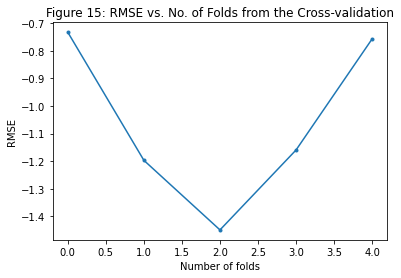

In [122]:
plt.figure()
plt.plot(scores, label="Validation Score",marker='.')
plt.xlabel('Number of folds')
plt.ylabel('RMSE')
plt.title('Figure 15: RMSE vs. No. of Folds from the Cross-validation')
plt.show()

**It is seen that 2 folds in the data, the RMSE score is the least, which means that it is possible to predict the trends in CO2 flux above the canopy given that the noise in the data can be avoided or if polynomial fit can be employed.**

### Polynomial Model Fit for the CO2 Flux using all independent vairables

In [123]:
import operator

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


polynomial_features= PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_flux)

model = LinearRegression()
model.fit(X_poly, y_flux)
y_poly_pred = model.predict(X_poly)

rmse = np.sqrt(mean_squared_error(y_flux,y_poly_pred))
r2 = r2_score(y_flux,y_poly_pred)
print(rmse)
print(r2)


0.527555286540971
0.8143264571092316


**The preliminary run with a degree >1, i.e., at 2 the polynomial fit considerably is predicting better i.e., R2 is increased from 0.528 to 0.814. Now will try to see if degrees is increased higher, will the R2 improve again.**

In [124]:
# fit multiple polynomial features
degrees = [1, 2, 3]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_flux_train_pred = np.zeros((len(X_flux_train), len(degrees)))
y_flux_test_pred = np.zeros((len(X_flux_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_flux_train, y_flux_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_flux_train_pred[:, i] = model.predict(X_flux_train)
    y_flux_test_pred[:, i] = model.predict(X_flux_test)

#### Narrowing it down to just one independent variable for plotting purposes:

In [125]:
# split into X and y for both train and test sets
# reshaping is required since sklearn requires the data to be in shape
# (n, 1), not as a series of shape (n, )
X_flux = Select_Tower_Flux_Meter_Both_OBS_data['SENSIBLE_HEAT_FLUX_ABV_CNPY']
X_flux_test = Select_Tower_Flux_Meter_Both_OBS_data['SENSIBLE_HEAT_FLUX_ABV_CNPY']

In [126]:
# Taking a chuck for our 20% test set
X_flux_remainder, X_flux_test, y_flux_remainder, y_flux_test = train_test_split(X_flux, y_flux, test_size = 0.2, shuffle=True, random_state=1)

In [127]:
# Splitting the remainder in two chunks
X_flux_train, X_flux_validation, y_flux_train, y_flux_validation = train_test_split(X_flux_remainder, y_flux_remainder, test_size = 0.3, shuffle=True, random_state=1)

#### Plotting the Polynomial regression model train data for the degrees = 1,2,3

Text(0.5, 1, 'Figure 16: Polynomial Fitting for the CO2 FLux Above Canopy vs. Sensible Heat Flux Train Data ')

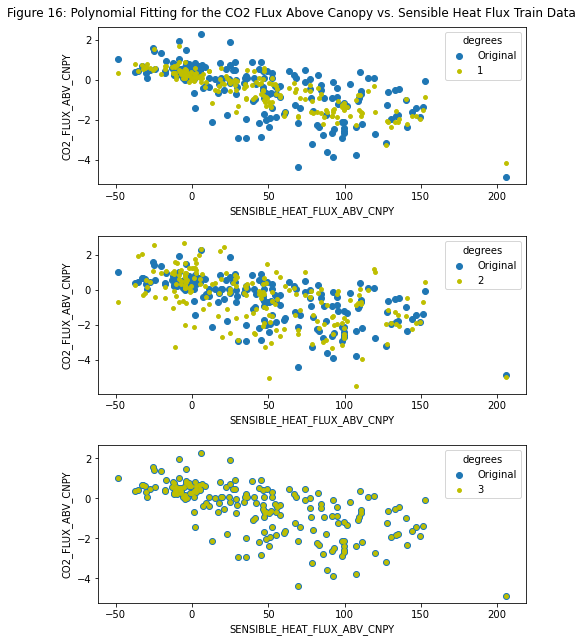

In [128]:
#note that the y axis is on a log scale

plt.figure(figsize=(7, 9))

# train data
for i, degree in enumerate(degrees):
    plt.subplot(310+i+1)
    plt.scatter(X_flux_train, y_flux_train)
    plt.xlabel("SENSIBLE_HEAT_FLUX_ABV_CNPY")
    plt.ylabel("CO2_FLUX_ABV_CNPY")
    plt.scatter(X_flux_train, y_flux_train_pred[:, i], s=15, color = 'y', label=str(degree))
    plt.legend(('Original', degree), title = 'degrees', loc='upper right')
    plt.tight_layout(pad=2.0)
plt.suptitle("Figure 16: Polynomial Fitting for the CO2 FLux Above Canopy vs. Sensible Heat Flux Train Data ", y=1) 

#### Plotting the Polynomial regression model test data for the degrees = 1,2,3

Text(0.5, 1, 'Figure 17: Polynomial Fitting for the CO2 FLux Above Canopy vs. Sensible Heat Flux Test Data ')

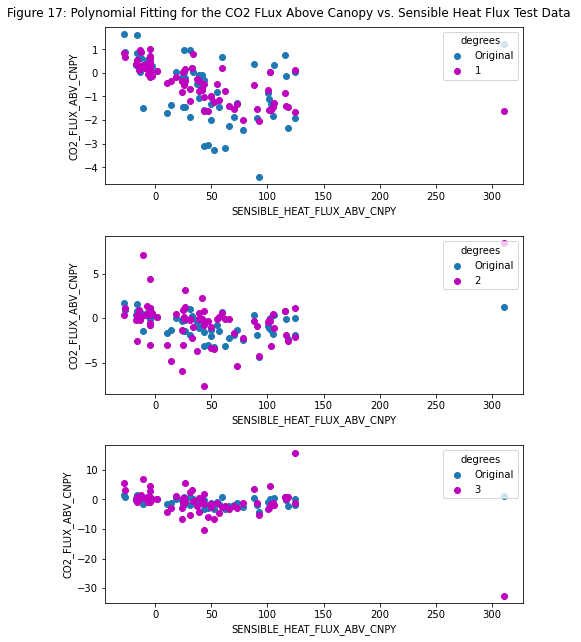

In [129]:
plt.figure(figsize=(7, 9))

# test data
for i, degree in enumerate(degrees):
    plt.subplot(310+i+1)
    plt.scatter(X_flux_test, y_flux_test)
    plt.xlabel("SENSIBLE_HEAT_FLUX_ABV_CNPY")
    plt.ylabel("CO2_FLUX_ABV_CNPY")
    plt.scatter(X_flux_test, y_flux_test_pred[:, i], color = 'm', label=str(degree))
    plt.legend(('Original', degree), title = 'degrees', loc='upper right')
    plt.tight_layout(pad=2.0)
plt.suptitle("Figure 17: Polynomial Fitting for the CO2 FLux Above Canopy vs. Sensible Heat Flux Test Data ", y=1) 

**Both the test and the train data to show greater R2 score for degrees 2 and 3, which indicates polynomial regression model captures the trends between the dependent and independent variables really well for the target variable "CO2 Flux Above the Canopy Cover in Boreal Forests**

## Now, working with the CO2 Concentration trends with the independent variables:

### Checking for normal distribution via histogram and Q-Q plot:

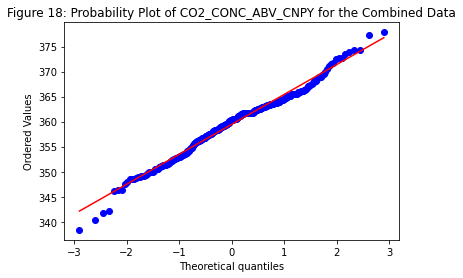

In [130]:
stats.probplot(Select_Tower_Flux_Meter_Both_OBS_data['CO2_CONC_ABV_CNPY'], dist="norm", plot = plt);
plt.title('Figure 18: Probability Plot of CO2_CONC_ABV_CNPY for the Combined Data')
plt.show();

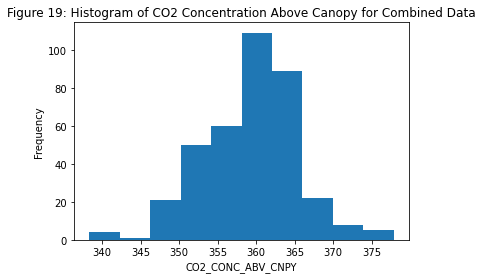

In [131]:
plt.figure()
plt.hist(Select_Tower_Flux_Meter_Both_OBS_data['CO2_CONC_ABV_CNPY'])
plt.xlabel('CO2_CONC_ABV_CNPY')
plt.ylabel('Frequency')
plt.title('Figure 19: Histogram of CO2 Concentration Above Canopy for Combined Data')
plt.show()

### Defining the target variables ('y') and the independent variables to all columns except y

In [132]:
y = Select_Tower_Flux_Meter_Both_OBS_data['CO2_CONC_ABV_CNPY']
X = Select_Tower_Flux_Meter_Both_OBS_data.drop(['CO2_CONC_ABV_CNPY'], axis =1)

## Fitting the Linear Regression Model:

In [133]:
X_withconstant = sm.add_constant(X)

In [134]:
# 1. Instantiate model
lm_CO2_Conc = sm.OLS(y, X_withconstant)

# 2. Fit model
lm_CO2_Conc_results = lm_CO2_Conc.fit()

lm_CO2_Conc_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      CO2_CONC_ABV_CNPY   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     17.22
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           1.02e-30
Time:                        11:54:15   Log-Likelihood:                -1093.7
No. Observations:                 369   AIC:                             2215.
Df Residuals:                     355   BIC:                             2270.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         361.1350      1.434    251.875      0.000     358.315     363.955
SENSIBLE_HEAT_FLUX_ABV_CNPY    -0.0064      0.009     -0.750      0.454      -0.023       0.010
LATENT_HEAT_FLUX_ABV_CNPY       0.0622      0.017      3.621      0.000       0.028       0.096
NET_RAD_ABV_CNPY                0.0103      0.003      3.848      0.000       0.005       0.016
CO2_FLUX_ABV_CNPY               0.9115      0.290      3.148      0.002       0.342       1.481
CO2_STORAGE                    -2.4823      1.619     -1.533      0.126      -5.667       0.702
WIND_DIR_MAG_ABV_CNPY          -0.0055      0.004     -1.452      0.147      -0.013       0.002
WIND_SPEED_ABV_CNPY            -0.4734      0.646     -0.733      0.464      -1.743       0.796
FRICTION_VELOC_ABV_CNPY         2.3038      4.239      0.543      0.587      -6.032      10.640
AIR_TEMP_ABV_CNPY              -0.1180      0.054     -2.200      0.028      -0.224      -0.013
SOIL_TEMP_10CM                 -0.8355      0.099     -8.434      0.000      -1.030      -0.641
SOIL_TEMP_100CM                 0.8112      0.144      5.625      0.000       0.528       1.095
VAPOR_PRESS_ABV_CNPY            2.0895      1.526      1.369      0.172      -0.911       5.090
RAIN_RATE                       7.4803      3.394      2.204      0.028       0.805      14.156
==============================================================================
Omnibus:                       15.894   Durbin-Watson:                   1.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.896
Skew:                           0.184   Prob(JB):                     7.19e-08
Kurtosis:                       4.416   Cond. No.                     3.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model summary from the linear regression shows the R2 score is about 38.7%. Similar to the CO2 Flux trends the CO2 concentration trends could be hard to predict using linear and hence, I'll directly work on plotting the residuals and working with PCA and cross-validation.

In [135]:
model_resids = lm_CO2_Conc_results.resid # this is where the residuals are stored

model_fittedvals = lm_CO2_Conc_results.fittedvalues # this is where the fitted values are stored

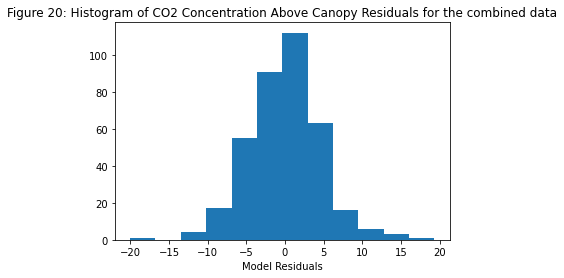

In [136]:
plt.figure()
plt.hist(model_resids,bins = 12)
plt.title('CO2 Concentration Above Canopy Residuals')
plt.xlabel('Model Residuals')
plt.title('Figure 20: Histogram of CO2 Concentration Above Canopy Residuals for the combined data')
plt.show()

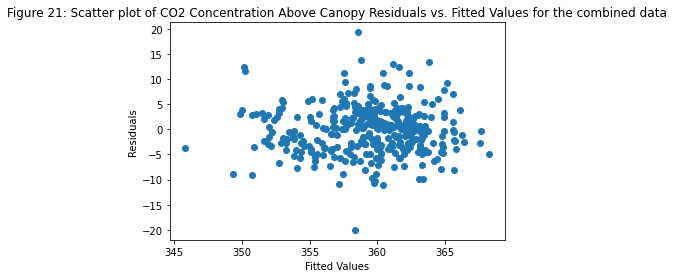

In [137]:
plt.figure()
plt.scatter(model_fittedvals, model_resids)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Figure 21: Scatter plot of CO2 Concentration Above Canopy Residuals vs. Fitted Values for the combined data')
plt.show()

**The residuals histogram shows a normal distribution and the fitted values plotted against the residuals indicate that the model could capture the trends better, but might be hindered due to existing noise**

In [138]:
# x, y = pd.Series(Select_Tower_Flux_Meter_Both_OBS_data['SENSIBLE_HEAT_FLUX_ABV_CNPY'], name="Sensible Heat Flux"), pd.Series(Select_Tower_Flux_Meter_Both_OBS_data['CO2_CONC_ABV_CNPY'], name="CO2 Flux Above Canopy")
# ax = sns.regplot(x=x, y=y, marker="+")

### Now using Sklearn to perform PCA to check if colinearity can be reduced by reducing dimensionality of the independent variables.

In [139]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [140]:
# Reload the fraud data
y_conc = Select_Tower_Flux_Meter_Both_OBS_data['CO2_CONC_ABV_CNPY']
X_conc = Select_Tower_Flux_Meter_Both_OBS_data.drop(['CO2_CONC_ABV_CNPY'], axis =1)


X_conc_train, X_conc_test, y_conc_train, y_conc_test = train_test_split(X_conc, y_conc, shuffle = True, test_size = 0.33, random_state=42)

In [141]:
X_conc_train.shape

(247, 13)

In [142]:
y_conc_train.shape

(247,)

In [143]:
my_PCA = PCA(n_components=13, random_state=None)

X_conc_train_pca = my_PCA.fit_transform(X_conc_train)

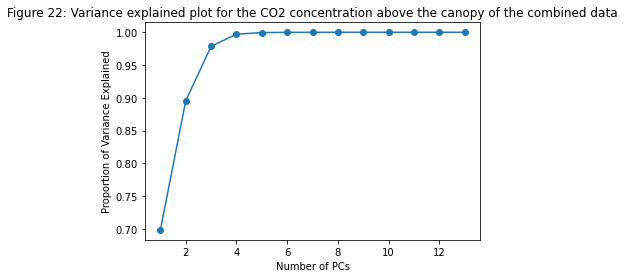

In [144]:
explained_variance_cum = my_PCA.explained_variance_ratio_.cumsum()

plt.figure()
plt.plot(range(1,14), explained_variance_cum)
plt.scatter(range(1,14), explained_variance_cum)
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.title('Figure 22: Variance explained plot for the CO2 concentration above the canopy of the combined data')
plt.show()

**Similar to the CO2 Flux PCA transformation results, the explained variance ratio of the model indicates that the R2 can be >90% even with just n_components > 4, so keeping just 4 components to verify.**

In [145]:
my_PCA = PCA(n_components=4, random_state=42)

X_conc_train_pca = my_PCA.fit_transform(X_conc_train)

In [146]:
my_PCA.explained_variance_ratio_

array([0.69838114, 0.19718822, 0.08299371, 0.01847298])

#### The explained vairance ratio shows that it is possible to get an R2 of 0.99 with just 4 components, so will be fitting the model with the transformed independent variable matrix

In [147]:
from sklearn.linear_model import LinearRegression
# 1. Instantiate the model
linear_regression_model = LinearRegression()

In [148]:
# 2. Fit the model
conc_model= linear_regression_model.fit(X_conc_train_pca, y_conc_train)

In [149]:
#The intercept
intercept = conc_model.intercept_

#The coefficient, notice it returns an array with one spot for each feature
coefficient = conc_model.coef_[0]

print(f'Intercept: {intercept}')
print(f'Coefficients:{coefficient}')

Intercept: 359.42630009076316
Coefficients:-0.002849295292689753


In [150]:
model_prediction = linear_regression_model.predict(X_conc_train_pca)

In [151]:
from sklearn.metrics import r2_score

# Evaluate the model on each set
print(f'The R2 score on the training set: {r2_score(y_conc_train, model_prediction)}')

The R2 score on the training set: 0.022891143757737598


#### But, with the transformed X's, the model R2 score seems to be dropping from 0.387 to 0.023 and hence increasing the number of components to 10 and determining the R2 again.

In [152]:
my_PCA = PCA(n_components=10, random_state=42)

X_conc_train_pca = my_PCA.fit_transform(X_conc_train)

In [153]:
from sklearn.linear_model import LinearRegression
# 1. Instantiate the model
linear_regression_model = LinearRegression()

In [154]:
# 2. Fit the model
conc_model= linear_regression_model.fit(X_conc_train_pca, y_conc_train)

In [155]:
#The intercept
intercept = conc_model.intercept_

#The coefficient, notice it returns an array with one spot for each feature
coefficient = conc_model.coef_[0]

print(f'Intercept: {intercept}')
print(f'Coefficients:{coefficient}')

Intercept: 359.42630009076316
Coefficients:-0.002849295292689754


In [156]:
model_prediction = linear_regression_model.predict(X_conc_train_pca)

In [157]:
from sklearn.metrics import r2_score

# Evaluate the model on each set
print(f'The R2 score on the training set: {r2_score(y_conc_train, model_prediction)}')

The R2 score on the training set: 0.3749508894234811


#### The R2 score increased to the original value of ~0.374, which means to say though the model seems to be predicting the trend, its still unable to capture the full trends. Hence, moving on to check the cross-validation score:

In [158]:
# Taking a chuck for our 20% test set
X_conc_remainder, X_conc_test, y_conc_remainder, y_conc_test = train_test_split(X_conc, y_conc, test_size = 0.2, shuffle=True, random_state=1)

In [159]:
# Splitting the remainder in two chunks
X_conc_train, X_conc_validation, y_conc_train, y_conc_validation = train_test_split(X_conc_remainder, y_conc_remainder, test_size = 0.3, shuffle=True, random_state=1)

In [160]:
print(f'Shape of test set: {X_conc_test.shape}')
print(f'Shape of validation set: {X_conc_validation.shape}')
print(f'Shape of train set: {X_conc_train.shape}')

Shape of test set: (74, 13)
Shape of validation set: (89, 13)
Shape of train set: (206, 13)


In [161]:
import re

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

scores = []

lm = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores=cross_val_score(lm, X_conc_validation, y_conc_validation, scoring='neg_root_mean_squared_error', cv=folds)
print(scores)

[-4.72603768 -4.73256479 -8.74096023 -5.77636909 -4.5518436 ]


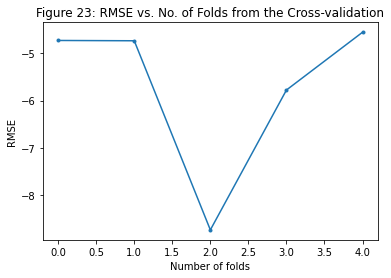

In [162]:
plt.figure()
plt.plot(scores, label="Validation Score",marker='.')
plt.xlabel('Number of folds')
plt.ylabel('RMSE')
plt.title('Figure 23: RMSE vs. No. of Folds from the Cross-validation')
plt.show()

**It is seen that 2 folds in the data, the RMSE score is the least, which means that it is possible to predict the trends in CO2 conc above the canopy given that the noise in the data can be avoided or if polynomial fit can be employed.**

### Polynomial Model Fit for the CO2 concentration using all independent vairables

In [163]:
import operator

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


polynomial_features= PolynomialFeatures(degree=3)
X_poly = polynomial_features.fit_transform(X_conc)

model = LinearRegression()
model.fit(X_poly, y_conc)
y_poly_pred = model.predict(X_poly)

rmse = np.sqrt(mean_squared_error(y_conc,y_poly_pred))
r2 = r2_score(y_conc,y_poly_pred)
print(rmse)
print(r2)


3.642008601646509e-05
0.9999999999629979


**The preliminary run with a degree >1, i.e., at 3 the polynomial fit considerably is predicting better i.e., R2 is increased from 0.333 to 0.999. Now will try to see if degrees is increased higher, will the R2 improve again.**

In [164]:
# fit multiple polynomial features
degrees = [1, 2, 3]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_conc_train_pred = np.zeros((len(X_conc_train), len(degrees)))
y_conc_test_pred = np.zeros((len(X_conc_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_conc_train, y_conc_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_conc_train_pred[:, i] = model.predict(X_conc_train)
    y_conc_test_pred[:, i] = model.predict(X_conc_test)

#### Narrowing it down to just one independent variable for plotting purposes:

In [165]:
# split into X and y for both train and test sets
# reshaping is required since sklearn requires the data to be in shape
# (n, 1), not as a series of shape (n, )
X_conc = Select_Tower_Flux_Meter_Both_OBS_data['SENSIBLE_HEAT_FLUX_ABV_CNPY']
X_conc_test = Select_Tower_Flux_Meter_Both_OBS_data['SENSIBLE_HEAT_FLUX_ABV_CNPY']

In [166]:
# Taking a chuck for our 20% test set
X_conc_remainder, X_conc_test, y_conc_remainder, y_conc_test = train_test_split(X_conc, y_conc, test_size = 0.2, shuffle=True, random_state=1)

In [167]:
# Splitting the remainder in two chunks
X_conc_train, X_conc_validation, y_conc_train, y_conc_validation = train_test_split(X_conc_remainder, y_conc_remainder, test_size = 0.3, shuffle=True, random_state=1)

#### Plotting the Polynomial regression model train data for the degrees = 1,2,3

Text(0.5, 1, 'Figure 24: Polynomial Fitting for the CO2 Concentration Above Canopy vs. Sensible Heat Flux Train Data ')

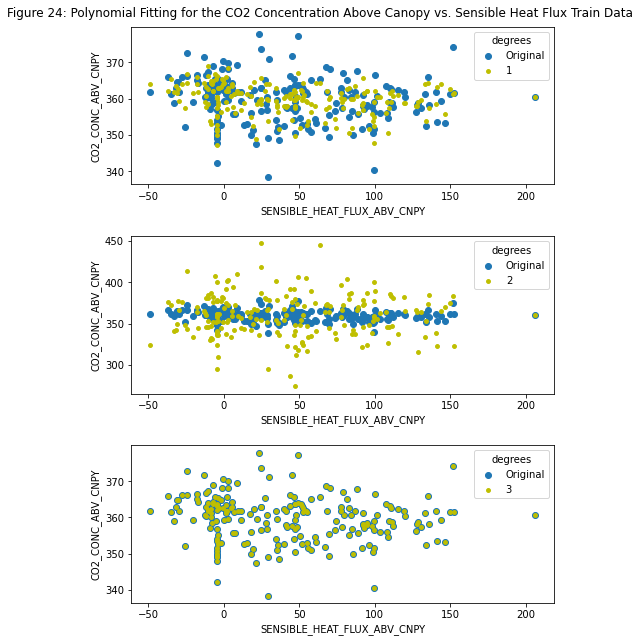

In [168]:
# note that the y axis is on a log scale

plt.figure(figsize=(7, 9))

# train data
for i, degree in enumerate(degrees):
    plt.subplot(310+i+1)
    plt.scatter(X_conc_train, y_conc_train)
    plt.xlabel("SENSIBLE_HEAT_FLUX_ABV_CNPY")
    plt.ylabel("CO2_CONC_ABV_CNPY")
    plt.scatter(X_conc_train, y_conc_train_pred[:, i], s=15, color = 'y', label=str(degree))
    plt.legend(('Original', degree), title = 'degrees', loc='upper right')
    plt.tight_layout(pad=2.0)
plt.suptitle("Figure 24: Polynomial Fitting for the CO2 Concentration Above Canopy vs. Sensible Heat Flux Train Data ", y=1) 

#### Plotting the Polynomial regression model test data for the degrees = 1,2,3

Text(0.5, 1, 'Figure 25: Polynomial Fitting for the CO2 Concentration Above Canopy vs. Sensible Heat Flux Test Data ')

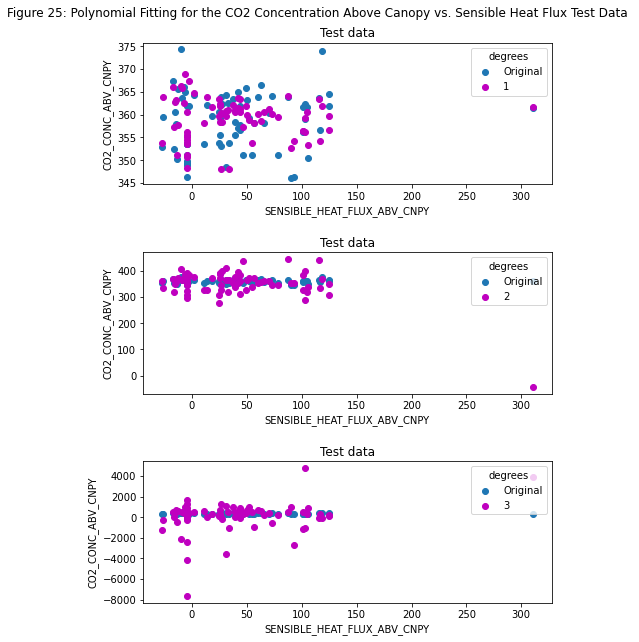

In [169]:
plt.figure(figsize=(7, 9))

# test data
for i, degree in enumerate(degrees):
    plt.subplot(310+i+1)
    plt.scatter(X_conc_test, y_conc_test)
    plt.title("Test data")
    plt.xlabel("SENSIBLE_HEAT_FLUX_ABV_CNPY")
    plt.ylabel("CO2_CONC_ABV_CNPY")
    plt.scatter(X_conc_test, y_conc_test_pred[:, i], color = 'm', label=str(degree))
    plt.legend(('Original', degree), title = 'degrees', loc='upper right')
    plt.tight_layout(pad=2.0)
plt.suptitle("Figure 25: Polynomial Fitting for the CO2 Concentration Above Canopy vs. Sensible Heat Flux Test Data ", y=1) 

### Plotting using seaborn along with regression line:

Text(0.5, 1.0, 'Figure 26: Polynomial Regression Fit (Degree = 3) for the CO2 Flux Above Canopy')

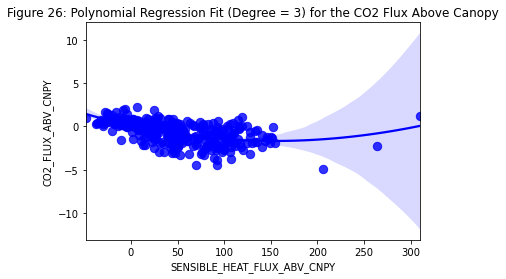

In [170]:
ax = sns.regplot(x='SENSIBLE_HEAT_FLUX_ABV_CNPY', y='CO2_FLUX_ABV_CNPY',
                 data=Select_Tower_Flux_Meter_Both_OBS_data, 
                 color="b", scatter_kws={"s": 70},
                 order=3)
ax.set_title('Figure 26: Polynomial Regression Fit (Degree = 3) for the CO2 Flux Above Canopy')

Text(0.5, 1.0, 'Figure 27: Polynomial Regression Fit (Degree = 2) for the CO2 Concentration Above Canopy')

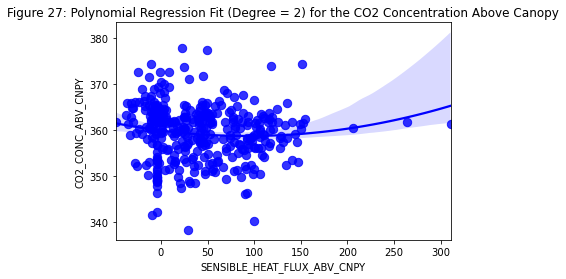

In [171]:
ax = sns.regplot(x='SENSIBLE_HEAT_FLUX_ABV_CNPY', y='CO2_CONC_ABV_CNPY',
                 data=Select_Tower_Flux_Meter_Both_OBS_data, color="b",
                 scatter_kws={"s": 70},
                 order=2)
ax.set_title('Figure 27: Polynomial Regression Fit (Degree = 2) for the CO2 Concentration Above Canopy')